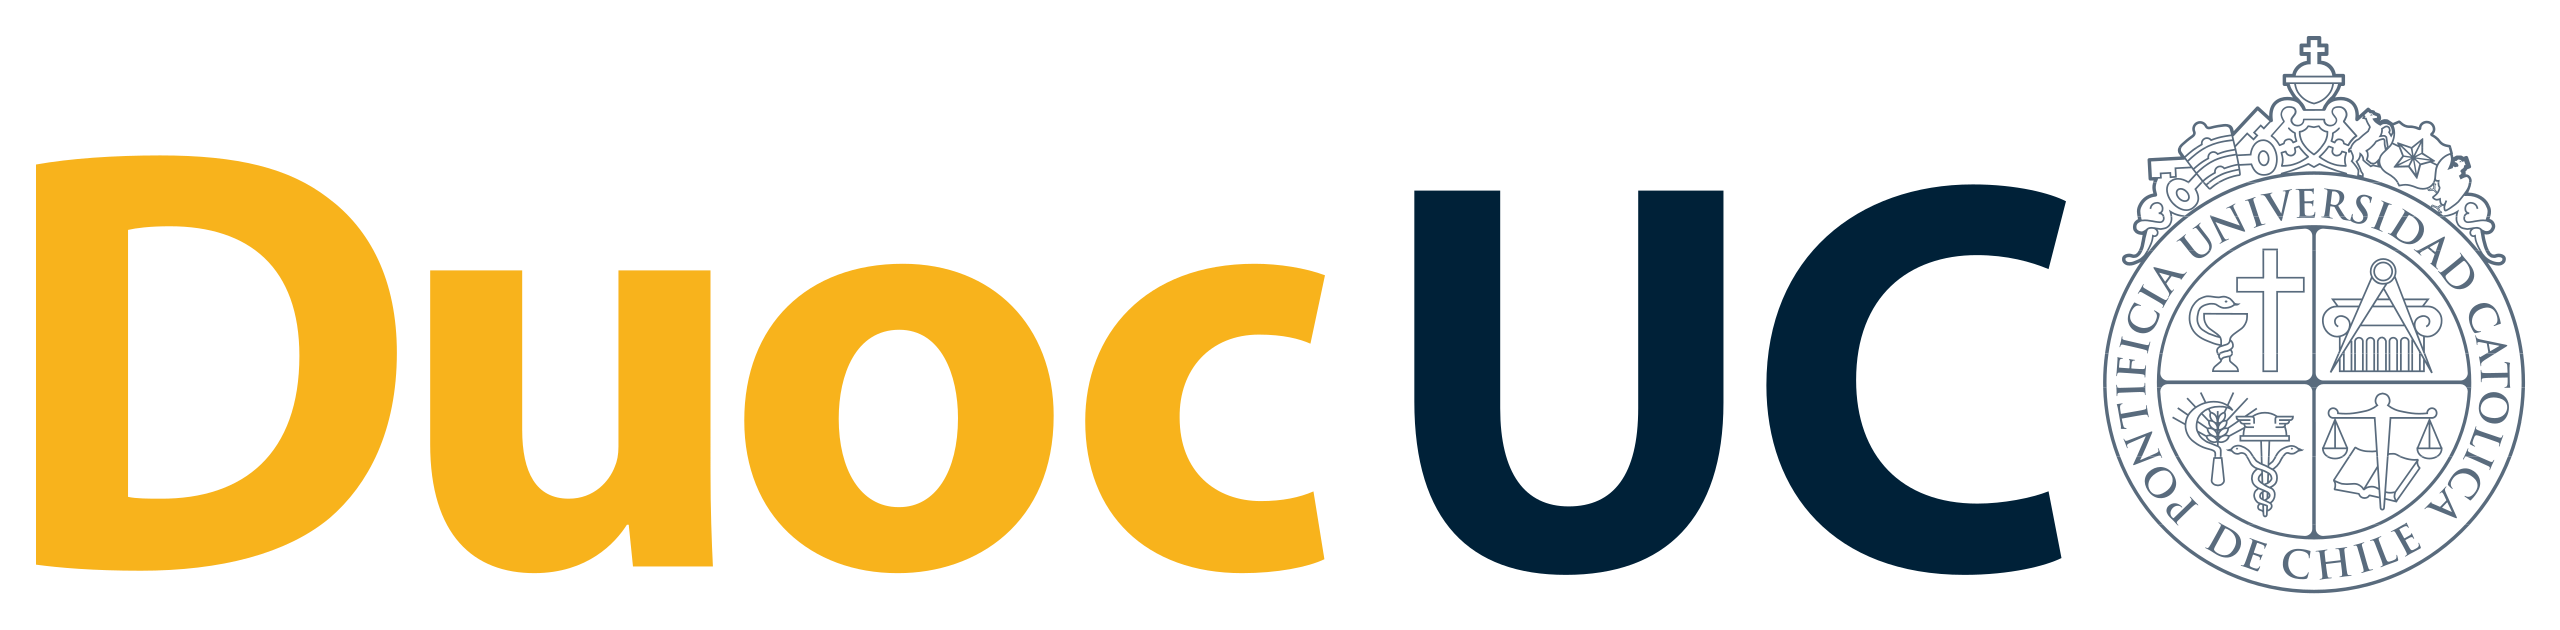


# **Examen Transversal - Minería de Datos**


## **Caso Meteorología de Australia**

# **Fase 1 - Entendimiento del Negocio**


La Oficina de Meteorología de la Commonwealth de Australia ha recopilado un Set de Datos metereológicos de Australia obtenidos entre 2007 y 2017.

El objetivo de este proyecto es comprender los datos, para posteriormente aplicar estadística descriptiva para comprender el comportamiento climático de Australia entre los periodos 2007-2017. Además de aplicar estadistica predictiva para pronosticar el comportamiento futuro del clima de este país caracterizado por su diversidad climática.

## Carga de Datos CSV



In [ ]:
#Importamos Librerias

from google.colab import files
import numpy as np                                    #Cálculos numéricos
import matplotlib.pyplot as plt                       #Visualización de graficos
import pandas as pd                                   #Analisis de datos, lectura de set de datos
import seaborn as sns                                 #Visualzación de gráficos avanzados
import csv                                            #Lectura y escritura de archivos .csv
# %matplotlib inline                                  #Para hacer estos gráficos dentro de un jupyter notebook
from sklearn.linear_model import LinearRegression     #Regresión Lineal con scikit-learn
from sklearn.model_selection import train_test_split  #Entrenamiento y Test de Modelos
from sklearn.metrics import mean_squared_error        #Error Cuadratico Medio

#Librerias para transformación de datos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Subida de archivo manual -------------------

#uploaded = files.upload()
#for fn in uploaded.keys():
#    name=fn
#weather = pd.read_csv(name, sep=",")

#Subida Desde Drive ---------------------------------
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/weatherAUS.csv"
weather = pd.read_csv(ruta)

#Subida de archivo desde directorio

#weather = pd.read_csv("weatherAUS.csv")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# **Fase 2 - Entendimiento de los Datos**

In [ ]:
#Visualización de set de datos del clima australiano

weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
#Saber la cantidad de registros que contiene el set de datos

print(weather.shape)

#Contamos con 142193 datos y 24 columnas

(142193, 24)


## Obtención de Información sobre las Variables

La función info() es útil para identificar los tipos de datos. Esto va de la mano junto con funciones que indican la cantidad de variables categóricas y variables numéricas.

Esta información obtenida nos permitirá elaborar el diccionario de datos.


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
#Verificación de la Cantidad de Variables Categóricas

tipos = weather.columns.to_series().groupby(weather.dtypes).groups # Agrupación de las columnas por tipo de datos
ctext = tipos[np.dtype('object')] # Conociendo la lista de columnas categóricas
len(ctext) # cantidad de columnas con datos categóricos.

7

In [ ]:
# Verificación de la cantidad de columnas numéricas

columnas = weather.columns
cnum = list(set(columnas) - set(ctext))
len(cnum)

17

## Diccionario de Datos

*   **Date:** Fecha de la observación  **(Variable categórica ordinal)**
*   **Location:** Ubicación de la estación meteorológica **(Variable categórica nominal)**
*   **MinTemp:** Temperatura mínima en grados Celsius **(Variable cuantitativa continua)**
*   **MaxTemp:** Temperatura máxima en grados Celsius **(Variable cuantitativa continua)**
*   **Rainfall:** Cantidad de lluvia registrada ese día en mm. **(Variable cuantitativa continua)**
*   **Evaporation:** Evaporación (mm) en 24 horas **(Variable cuantitativa continua)**

*   **Sunshine:** número de horas de sol brillante en el día **(Variable cuantitativa continua)**      
*   **WindGustDir:** dirección de la ráfaga de viento más fuerte en 24 horas. **(Variable categórica nominal)**
*   **WindGustSpeed:** velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas. **(Variable cuantitativa continua)**
*   **WindDir9am:** dirección del viento a las 9am **(Variable categórica nominal)**
*   **WindDir3pm:** dirección del viento a las 3pm **(Variable categórica nominal)**
*   **WindSpeed9am:** velocidad (km/hr) del viento a las 9am **(Variable cuantitativa continua)**
*   **WindSpeed3pm:** velocidad (km/hr) del viento a las 3pm **(Variable cuantitativa continua)**
*   **Humidity9am:** porcentaje de humedad a las 9am **(Variable cuantitativa continua)**
*   **Humidity3pm:** porcentaje de humedad a las 3pm **(Variable cuantitativa continua)**
*   **Pressure9am:** presión atmosférica (hpa) a nivel del mar a las 9am **(Variable cuantitativa continua)**
*   **Pressure3pm:** presión atmosférica (hpa) a nivel del mar a las 3pm **(Variable cuantitativa continua)**
*   **Cloud9am:**
Fración del cielo cubierto por nubes a las 9am. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto. **(Variable Cuantitativa Discreta)**
*   **Cloud3pm:** Fración del cielo cubierto por nubes a las 3pm. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto. **(Variable Cuantitativa Discreta)**
*   **Temp9am:** temperatura en grados celsius a las 9am **(Variable cuantitativa continua)**
*   **Temp3pm:** temperatura en grados celsius a las 3pm **(Variable cuantitativa continua)**
*   **RainToday:** Variable indicadora que toma el valor 1 si la precipitación en mm. en las últimas 24 hrs. excede 1 mm. y 0 si no. **(Variable categórica binaria)**
*   **RISK_MM:** La cantidad de lluvia. Una especie de medida del "riesgo". **(Variable cuantitativa continua)**
*   **RainTomorrow:** Variable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no. **(Variable categórica binaria)**


# **Fase 3 - Preparación de los Datos**

## Proceso de Limpieza de Datos

Se realizará el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas.
2. Columnas irrelevantes para el problema a resolver.
3. Registros (filas) repetidos.
4. Valores extremos (*outliers*) de variables numéricas. Se deben analizar en detalle cada caso particulas, pues no necesariamente la solución es eliminarlos.
5. Errores tipográficos de variables categóricas.

Al final de este proceso de limpieza contaremos un set de datos **íntegro**, listo para la fase del Análisis Exploratorio.

## Verificación de datos nulos

Complementando a la función info(), para saber de manera más específica la cantidad de datos nulos (NaN), aplicaremos la función isna() a cada columna e imprimirá su cantidad de datos nulos.

In [ ]:
# Verificación de valores nulos
for feature in weather.columns:
  print('Total de valores nulos de', feature, '=', weather[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 637
Total de valores nulos de MaxTemp = 322
Total de valores nulos de Rainfall = 1406
Total de valores nulos de Evaporation = 60843
Total de valores nulos de Sunshine = 67816
Total de valores nulos de WindGustDir = 9330
Total de valores nulos de WindGustSpeed = 9270
Total de valores nulos de WindDir9am = 10013
Total de valores nulos de WindDir3pm = 3778
Total de valores nulos de WindSpeed9am = 1348
Total de valores nulos de WindSpeed3pm = 2630
Total de valores nulos de Humidity9am = 1774
Total de valores nulos de Humidity3pm = 3610
Total de valores nulos de Pressure9am = 14014
Total de valores nulos de Pressure3pm = 13981
Total de valores nulos de Cloud9am = 53657
Total de valores nulos de Cloud3pm = 57094
Total de valores nulos de Temp9am = 904
Total de valores nulos de Temp3pm = 2726
Total de valores nulos de RainToday = 1406
Total de valores nulos de RISK_MM = 0
Total de val

## Tratamiento de Datos Nulos

### Variables Categóricas

Las siguientes variables categóricas cuentan con datos nulos a tratar:

*   WindGustDir
*   WindDir9am
*   WindDir3pm
*   RainToday             

Sus datos nulos serán reemplazados por la moda, con el objetivo de que los cálculos estadísticos no sean notablemente afectados.


**Gráficos de comparación**

Se comprobará el nivel de afección de los datos categóricos antes y después de la eliminación de datos nulos mediante gráficos de dispersión:

Se comparará las variables de categóricas de viento, con la velocidad del viento.

<Axes: xlabel='WindGustDir', ylabel='WindGustSpeed'>

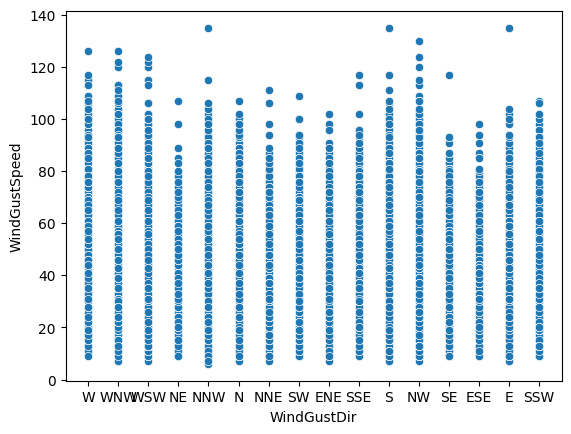

In [ ]:
sns.scatterplot(data=weather, x="WindGustDir", y="WindGustSpeed")

<Axes: xlabel='WindDir9am', ylabel='WindGustSpeed'>

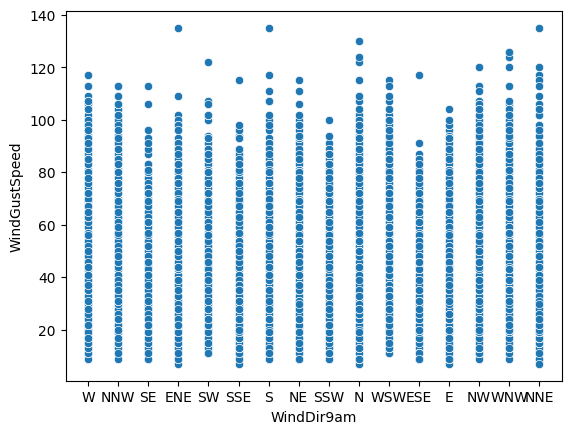

In [ ]:
sns.scatterplot(data=weather, x="WindDir9am", y="WindGustSpeed")


<Axes: xlabel='WindDir3pm', ylabel='WindGustSpeed'>

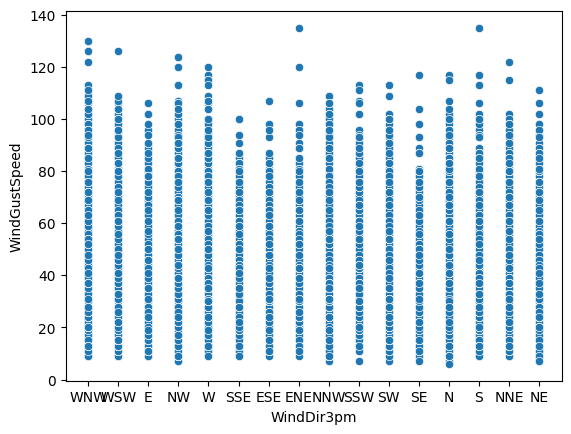

In [ ]:
sns.scatterplot(data=weather, x="WindDir3pm", y="WindGustSpeed")


**Proceso de Sustitucion**

Se procederá a sustituir registros categóricos con dato nulo utilizando la función fillna().


In [ ]:
#Obtención de la moda
weather.WindGustDir.mode()

0    W
Name: WindGustDir, dtype: object

In [ ]:
#Prueba de extracción de la moda de la columna
str((weather.WindGustDir.mode()).iloc[[0][0]])

'W'

In [ ]:
#Reemplazo de valores nulos categórios por la moda
weather['WindGustDir'] = weather['WindGustDir'].fillna(str((weather.WindGustDir.mode()).iloc[[0][0]]))
weather['WindDir9am'] = weather['WindDir9am'].fillna(str((weather.WindDir9am.mode()).iloc[[0][0]]))
weather['WindDir3pm'] = weather['WindDir3pm'].fillna(str((weather.WindDir3pm.mode()).iloc[[0][0]]))
weather['RainToday'] = weather['RainToday'].fillna(str((weather.RainToday.mode()).iloc[[0][0]]))

In [ ]:
# Verificación de valores nulos
for feature in weather.columns:
  print('Total de valores nulos de', feature, '=', weather[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 637
Total de valores nulos de MaxTemp = 322
Total de valores nulos de Rainfall = 1406
Total de valores nulos de Evaporation = 60843
Total de valores nulos de Sunshine = 67816
Total de valores nulos de WindGustDir = 0
Total de valores nulos de WindGustSpeed = 9270
Total de valores nulos de WindDir9am = 0
Total de valores nulos de WindDir3pm = 0
Total de valores nulos de WindSpeed9am = 1348
Total de valores nulos de WindSpeed3pm = 2630
Total de valores nulos de Humidity9am = 1774
Total de valores nulos de Humidity3pm = 3610
Total de valores nulos de Pressure9am = 14014
Total de valores nulos de Pressure3pm = 13981
Total de valores nulos de Cloud9am = 53657
Total de valores nulos de Cloud3pm = 57094
Total de valores nulos de Temp9am = 904
Total de valores nulos de Temp3pm = 2726
Total de valores nulos de RainToday = 0
Total de valores nulos de RISK_MM = 0
Total de valores nulos de

Comprobación de la dispersión después

<Axes: xlabel='WindGustDir', ylabel='WindGustSpeed'>

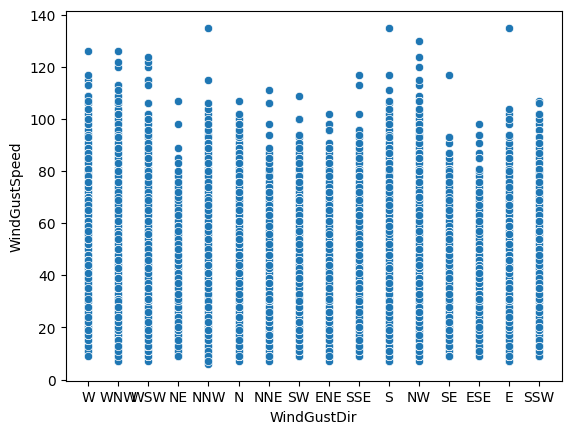

In [ ]:
sns.scatterplot(data=weather, x="WindGustDir", y="WindGustSpeed")

<Axes: xlabel='WindDir9am', ylabel='WindGustSpeed'>

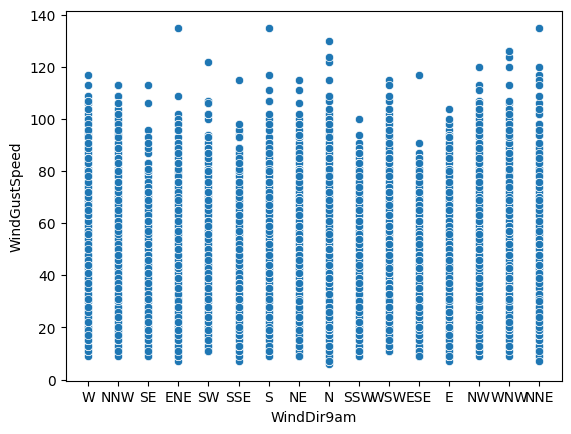

In [ ]:
sns.scatterplot(data=weather, x="WindDir9am", y="WindGustSpeed")

<Axes: xlabel='WindDir3pm', ylabel='WindGustSpeed'>

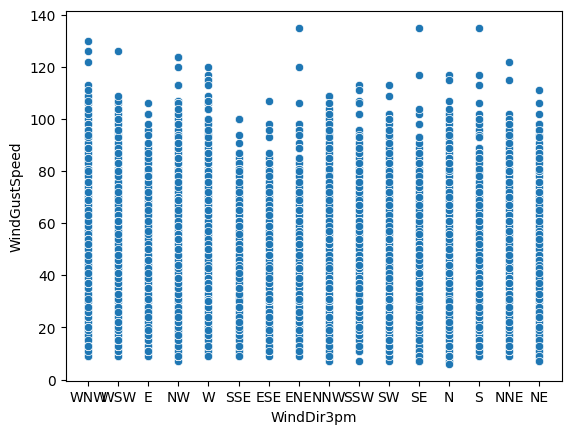

In [ ]:
sns.scatterplot(data=weather, x="WindDir3pm", y="WindGustSpeed")

**Conclusión:** La variación de los datos antes y después de su eliminación no es significativa, por lo tanto se conserva la eliminación.

In [ ]:
# Verificación de valores nulos

# Conteo de los niveles de las diferentes columnas categóricas
cols_cat = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow']

for feature in cols_cat:
  print('Total de valores nulos de', feature, '=', weather[feature].isna().sum())

Total de valores nulos de WindGustDir = 0
Total de valores nulos de WindDir9am = 0
Total de valores nulos de WindDir3pm = 0
Total de valores nulos de RainTomorrow = 0


### Sustitución de valores numéricos

Los valores nulos de las variables numéricas serán reemplazados por un valor sucedáneo, que es el promedio entre la moda, la mediana y el promedio de la columna, con el propósito de que no se vean gravemente afectados los cálculos estadísticos. Para agilizar la operación, se realizará una función que cumpla con esta tarea.

Las variables numéricas a modificar serán:

*   Rainfall
*   Evaporation    
*   Sunshine
*   WindGustSpeed
*   WindSpeed9am
*   WindSpeed3pm
*   Humidity9am
*   Humidity3pm
*   Pressure9am
*   Pressure3pm
*   Cloud9am
*   Cloud3pm
*   Temp9am        
*   Temp3pm        

**Comparación de datos estadísticos antes de la limpieza**

In [ ]:
weather.Rainfall.describe()

count    140787.000000
mean          2.349974
std           8.465173
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

In [ ]:
weather.Evaporation.describe()

count    81350.000000
mean         5.469824
std          4.188537
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

In [ ]:
weather.Sunshine.describe()

count    74377.000000
mean         7.624853
std          3.781525
min          0.000000
25%          4.900000
50%          8.500000
75%         10.600000
max         14.500000
Name: Sunshine, dtype: float64

In [ ]:
weather.WindGustSpeed.describe()

count    132923.000000
mean         39.984292
std          13.588801
min           6.000000
25%          31.000000
50%          39.000000
75%          48.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

In [ ]:
weather.WindSpeed9am.describe()

count    140845.000000
mean         14.001988
std           8.893337
min           0.000000
25%           7.000000
50%          13.000000
75%          19.000000
max         130.000000
Name: WindSpeed9am, dtype: float64

In [ ]:
weather.WindSpeed3pm.describe()

count    139563.000000
mean         18.637576
std           8.803345
min           0.000000
25%          13.000000
50%          19.000000
75%          24.000000
max          87.000000
Name: WindSpeed3pm, dtype: float64

In [ ]:
weather.Humidity9am.describe()

count    140419.000000
mean         68.843810
std          19.051293
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64

In [ ]:
weather.Humidity3pm.describe()

count    138583.000000
mean         51.482606
std          20.797772
min           0.000000
25%          37.000000
50%          52.000000
75%          66.000000
max         100.000000
Name: Humidity3pm, dtype: float64

In [ ]:
weather.Pressure9am.describe()

count    128179.000000
mean       1017.653758
std           7.105476
min         980.500000
25%        1012.900000
50%        1017.600000
75%        1022.400000
max        1041.000000
Name: Pressure9am, dtype: float64

In [ ]:
weather.Pressure3pm.describe()

count    128212.000000
mean       1015.258204
std           7.036677
min         977.100000
25%        1010.400000
50%        1015.200000
75%        1020.000000
max        1039.600000
Name: Pressure3pm, dtype: float64

In [ ]:
weather.Cloud9am.describe()

count    88536.000000
mean         4.437189
std          2.887016
min          0.000000
25%          1.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud9am, dtype: float64

In [ ]:
weather.Cloud3pm.describe()

count    85099.000000
mean         4.503167
std          2.720633
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud3pm, dtype: float64

In [ ]:
weather.Temp9am.describe()

count    141289.000000
mean         16.987509
std           6.492838
min          -7.200000
25%          12.300000
50%          16.700000
75%          21.600000
max          40.200000
Name: Temp9am, dtype: float64

In [ ]:
weather.Temp3pm.describe()

count    139467.000000
mean         21.687235
std           6.937594
min          -5.400000
25%          16.600000
50%          21.100000
75%          26.400000
max          46.700000
Name: Temp3pm, dtype: float64

In [ ]:
#Funcion para calcular e insertar valores sucedaneos
def insertarSucedaneo(columna,promedio,moda,mediana):
  arrSucedaneo = np.array([promedio, moda, mediana])
  sucedaneo = np.mean(arrSucedaneo)
  weather[columna] = weather[columna].fillna(sucedaneo)

In [ ]:
#Llamamos a la función pasando por parámetro el promedio, la moda y la mediana de cada columna

insertarSucedaneo("MaxTemp", float(weather.MaxTemp.mean()), float(weather.MaxTemp.mode()), float(weather.MaxTemp.median()))
insertarSucedaneo("MinTemp", int(weather.MinTemp.mean()), (weather.MinTemp.mode()).iloc[[0]], int(weather.MinTemp.median()))
insertarSucedaneo("Rainfall", float(weather.Rainfall.mean()), float(weather.Rainfall.mode()), float(weather.Rainfall.median()))
insertarSucedaneo("Evaporation", float(weather.Evaporation.mean()), float(weather.Evaporation.mode()), float(weather.Evaporation.median()))
insertarSucedaneo("Sunshine", float(weather.Sunshine.mean()), float(weather.Sunshine.mode()), float(weather.Sunshine.median()))
insertarSucedaneo("WindGustSpeed", float(weather.WindGustSpeed.mean()), float(weather.WindGustSpeed.mode()), float(weather.WindGustSpeed.median()))
insertarSucedaneo("WindSpeed9am", float(weather.WindSpeed9am.mean()), float(weather.WindSpeed9am.mode()), float(weather.WindSpeed9am.median()))
insertarSucedaneo("WindSpeed3pm", float(weather.WindSpeed3pm.mean()), float(weather.WindSpeed3pm.mode()), float(weather.WindSpeed3pm.median()))
insertarSucedaneo("Humidity9am", float(weather.Humidity9am.mean()), float(weather.Humidity9am.mode()), float(weather.Humidity9am.median()))
insertarSucedaneo("Humidity3pm", float(weather.Humidity3pm.mean()), float(weather.Humidity3pm.mode()), float(weather.Humidity3pm.median()))
insertarSucedaneo("Pressure9am", float(weather.Pressure9am.mean()), float(weather.Pressure9am.mode()), float(weather.Pressure9am.median()))
insertarSucedaneo("Pressure3pm", float(weather.Pressure3pm.mean()), float(weather.Pressure3pm.mode()), float(weather.Pressure3pm.median()))
insertarSucedaneo("Cloud9am", float(weather.Cloud9am.mean()), float(weather.Cloud9am.mode()), float(weather.Cloud9am.median()))
insertarSucedaneo("Cloud3pm", float(weather.Cloud3pm.mean()), float(weather.Cloud3pm.mode()), float(weather.Cloud3pm.median()))
insertarSucedaneo("Temp9am", float(weather.Temp9am.mean()), float(weather.Temp9am.mode()), float(weather.Temp9am.median()))
insertarSucedaneo("Temp3pm", float(weather.Temp3pm.mean()), float(weather.Temp3pm.mode()), float(weather.Temp3pm.median()))

#NOTA IMPORTANTE: Debido a que hay 2 modas de MinTemp, se optó por elegir el primer valor con la función iloc()

<ipython-input-267-614dbb20cabd>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arrSucedaneo = np.array([promedio, moda, mediana])


**Comparación de datos estadísticos después de la limpieza**

In [ ]:
weather.MaxTemp.describe()

count    142193.000000
mean         23.223875
std           7.109817
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64

In [ ]:
weather.MinTemp.describe()

count    142193.000000
mean         12.181981
std           6.389263
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64

In [ ]:
weather.Rainfall.describe()

count    142193.000000
mean          2.334483
std           8.424643
min           0.000000
25%           0.000000
50%           0.000000
75%           0.783325
max         371.000000
Name: Rainfall, dtype: float64

In [ ]:
weather.Evaporation.describe()

count    142193.000000
mean          5.164646
std           3.187707
min           0.000000
25%           4.000000
50%           4.756608
75%           5.400000
max         145.000000
Name: Evaporation, dtype: float64

In [ ]:
weather.Sunshine.describe()

count    142193.000000
mean          6.551809
std           2.956798
min           0.000000
25%           5.374951
50%           5.374951
75%           8.700000
max          14.500000
Name: Sunshine, dtype: float64

In [ ]:
weather.WindGustSpeed.describe()

count    142193.000000
mean         39.854588
std          13.147562
min           6.000000
25%          31.000000
50%          37.994764
75%          46.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

In [ ]:
weather.WindGustSpeed.describe()

count    142193.000000
mean         39.854588
std          13.147562
min           6.000000
25%          31.000000
50%          37.994764
75%          46.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

In [ ]:
weather.Cloud9am.describe()

count    142193.000000
mean          4.830344
std           2.333388
min           0.000000
25%           3.000000
50%           5.479063
75%           6.000000
max           9.000000
Name: Cloud9am, dtype: float64

In [ ]:
weather.Cloud3pm.describe()

count    142193.000000
mean          4.903844
std           2.160808
min           0.000000
25%           4.000000
50%           5.501056
75%           6.000000
max           9.000000
Name: Cloud3pm, dtype: float64

Observación: La variación de los datos numéricos no es significativa, por lo tanto se conservará la sustitución

In [ ]:
#Comprobamos la información del dataset para comprobar que fueron rellenados los datos nulos

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  object 
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  object 
 10  WindDir3pm     142193 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-nul

## Columnas Irrelevantes

Para que una columna sea irrelevante debe cumplir los siguientes criterios:


*   Columna sin información relevante para el problema que buscamos resolver.
*   Columna categórica con un sólo nivel. Por ejemplo que todos los registros tengan el mismo valor.
*   Columna numérica con un sólo valor.
*   Columnas con información redundante.

Ante la duda de si alguna columna es relevante o no, es conveniente dejarla y más adelante su permanencia o eliminación.

In [ ]:
# Conteo de los niveles de las diferentes columnas categóricas
cols_cat = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow']

for col in cols_cat:
  print(f'Columna {col}: {weather[col].nunique()} subniveles')

Columna Date: 3436 subniveles
Columna Location: 49 subniveles
Columna WindGustDir: 16 subniveles
Columna WindDir9am: 16 subniveles
Columna WindDir3pm: 16 subniveles
Columna RainToday: 2 subniveles
Columna RainTomorrow: 2 subniveles


Todas las columnas categóricas cuentan con más de 1 subnivel. No se eliminará ninguna.

In [ ]:
#Verificación de datos numéricos

weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.181981,23.223875,2.334483,5.164646,6.551809,39.854588,13.983015,18.605053,68.974028,51.491363,1017.610804,1015.264221,4.830344,4.903844,16.986926,21.672700,2.360682
std,6.389263,7.109817,8.424643,3.187707,2.956798,13.147562,8.853206,8.724769,18.967491,20.532137,6.747499,6.681812,2.333388,2.160808,6.472170,6.871557,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,5.374951,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000
50%,12.000000,22.600000,0.000000,4.756608,5.374951,37.994764,13.000000,17.000000,70.000000,51.827535,1017.217919,1015.319401,5.479063,5.501056,16.800000,20.929078,0.000000
75%,16.800000,28.200000,0.783325,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


Con la desviación estándar (std) podemos verificar si una columna tiene distintos rangos de valores. Si la desviación estándar es igual a 0, entonces todos sus valores son iguales.

Ninguna columna numérica tiene desviaciones estándar igual a 0,  no tienen un sólo valor único. Por lo tanto se conservarán todas las columnas numéricas.


## Identificar Valores Atípicos (Outliers)


No en todos los casos deben eliminarse los *outliers*, dependiendo de la variable analizada, esta puede contener información importante.

Utilizando la librería seaborn, Verificaremos los outliers de columnas numéricas mediante gráficos de caja individuales:

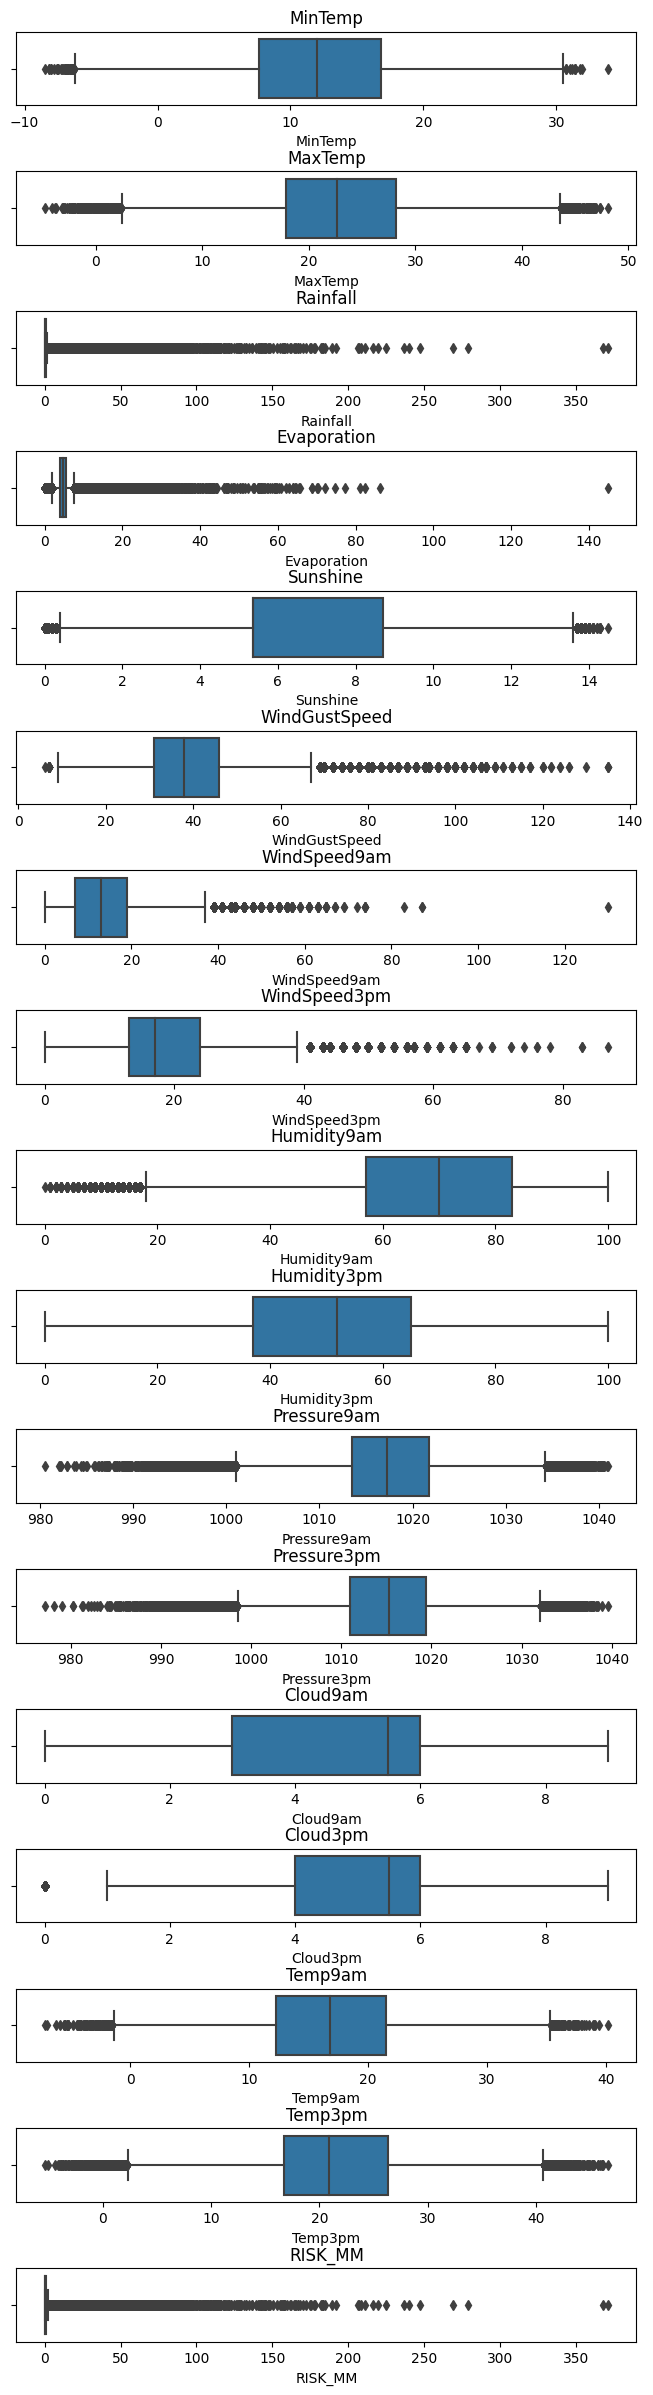

In [ ]:
# Columnas Numéricas
cols_num = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
            'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
            'Temp9am', 'Temp3pm', 'RISK_MM']

#Generación de gráficos
fig, ax = plt.subplots(nrows=17, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.9)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=weather, ax=ax[i])
    ax[i].set_title(col)

**Observación:** Se ha llegado a la conclusion de no borrar ningún valor atípico, debido a que estos no afectan al examen estadístico.

## Errores de Tipografía en Variables Categóricas

En una variable categórica pueden aparecer sub-niveles que para nosotros sean equivalentes, pero que el sistema detecte como subniveles diferentes debido a errores ortográficos.

Para verificar y posteriormente unificar estos sub-niveles, primero se verificará la información mediante gráficos de barra.

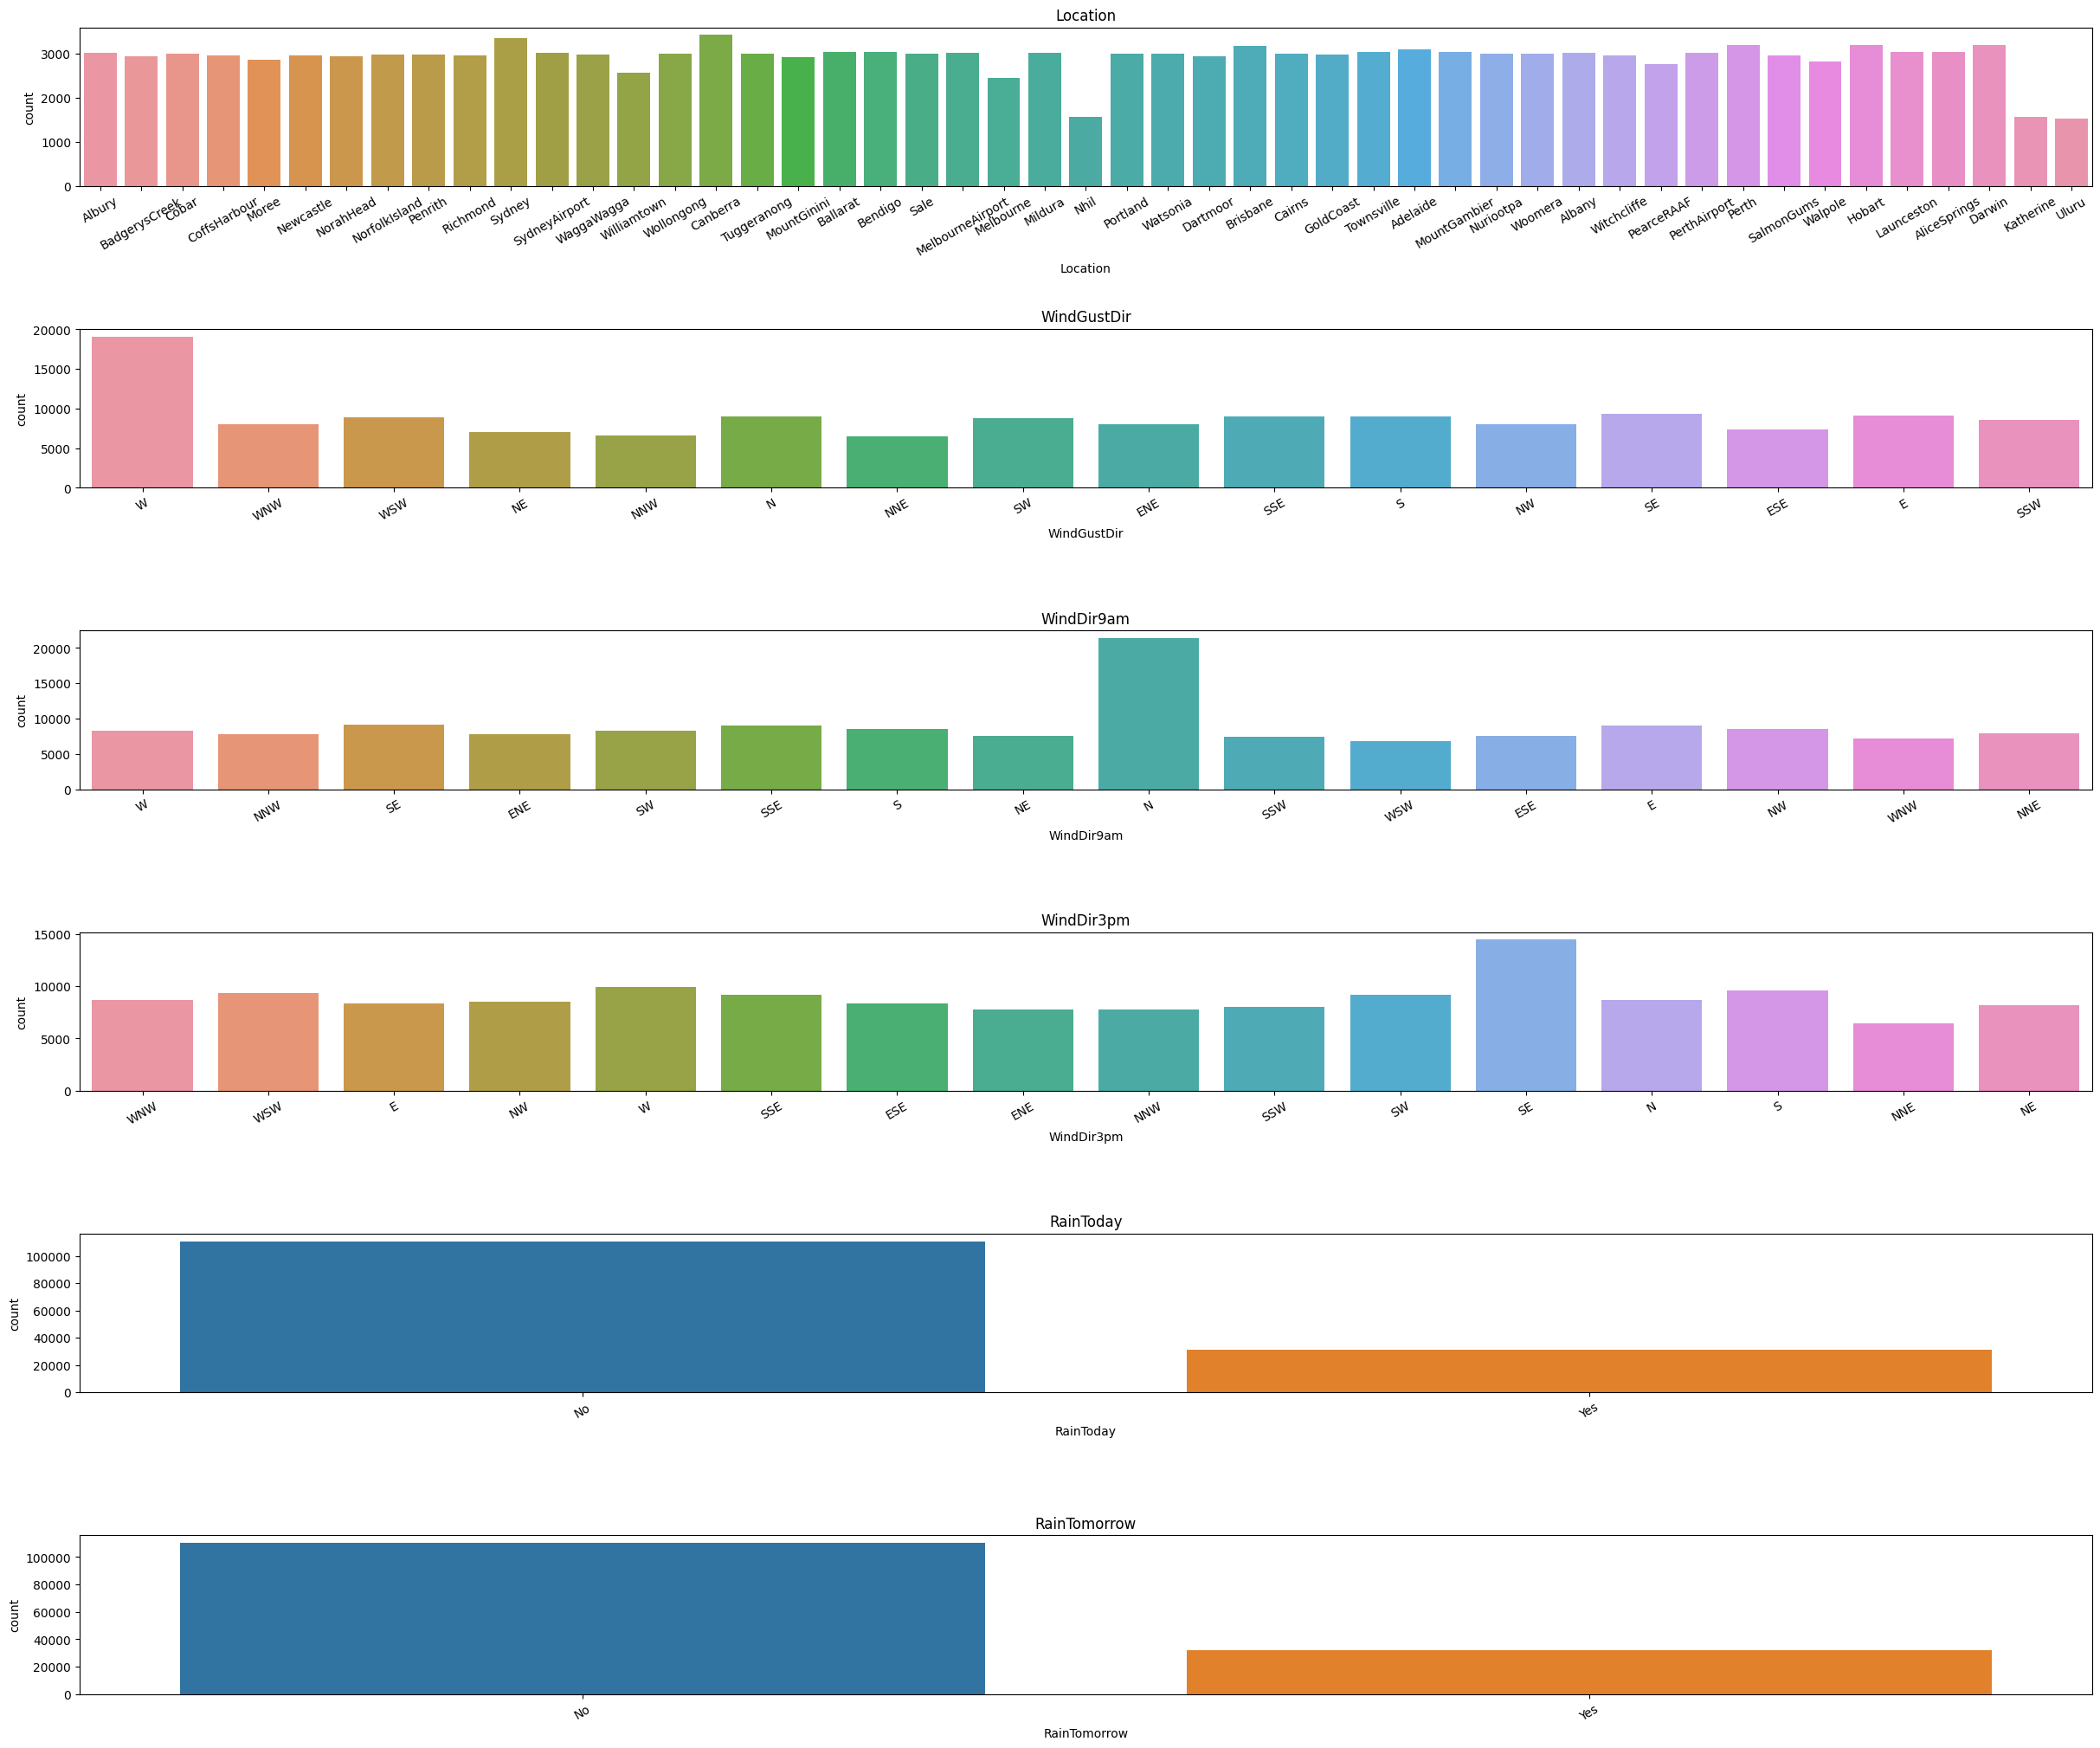

In [ ]:
cols_cat = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow']

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(30,25))
fig.subplots_adjust(hspace=0.9)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=weather, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Podemos observar que ninguna variable categórica cuenta con sub-niveles iguales, pero escritos de manera distinta.

Por lo tanto no es necesario unificar subniveles.

## Transformación de Datos

Con el propósito de trabajar con datos categóricos de manera más fácil a la hora de graficar, se ha aplicado el método Label Encoder.

In [ ]:
#Transformacion de tipo objeto a numerico.

le = LabelEncoder()
weatherTransform = weather.iloc[:, 0:-1].values
pd.DataFrame(weatherTransform)

#1   Location
weatherTransform[:, 1] = le.fit_transform(weatherTransform[:, 1])

#7   WindGustDir
weatherTransform[:, 7] = le.fit_transform(weatherTransform[:, 7])

#9   WindDir9am
weatherTransform[:, 9] = le.fit_transform(weatherTransform[:, 9])

#10  WindDir3pm
weatherTransform[:, 10] = le.fit_transform(weatherTransform[:, 10])

#21  RainToday
weatherTransform[:, 21] = le.fit_transform(weatherTransform[:, 21])

#23  RainTomorrow
weatherTransform[:, 21] = le.fit_transform(weatherTransform[:, 21])

In [ ]:
pd.DataFrame(weatherTransform)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2008-12-01,2,13.4,22.9,0.6,4.756608,5.374951,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.501056,16.9,21.8,0,0.0
1,2008-12-02,2,7.4,25.1,0.0,4.756608,5.374951,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.479063,5.501056,17.2,24.3,0,0.0
2,2008-12-03,2,12.9,25.7,0.0,4.756608,5.374951,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.479063,2.0,21.0,23.2,0,0.0
3,2008-12-04,2,9.2,28.0,0.0,4.756608,5.374951,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.479063,5.501056,18.1,26.5,0,1.0
4,2008-12-05,2,17.5,32.3,1.0,4.756608,5.374951,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,41,3.5,21.8,0.0,4.756608,5.374951,0,31.0,2,...,59.0,27.0,1024.7,1021.2,5.479063,5.501056,9.4,20.9,0,0.0
142189,2017-06-21,41,2.8,23.4,0.0,4.756608,5.374951,0,31.0,9,...,51.0,24.0,1024.6,1020.3,5.479063,5.501056,10.1,22.4,0,0.0
142190,2017-06-22,41,3.6,25.3,0.0,4.756608,5.374951,6,22.0,9,...,56.0,21.0,1023.5,1019.1,5.479063,5.501056,10.9,24.5,0,0.0
142191,2017-06-23,41,5.4,26.9,0.0,4.756608,5.374951,3,37.0,9,...,53.0,24.0,1021.0,1016.8,5.479063,5.501056,12.5,26.1,0,0.0


## Exploración de los Datos

Se procederá a analizar los datos relevantes dentro del dataset del clima australiano.

In [ ]:
#Descripción General

weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.181981,23.223875,2.334483,5.164646,6.551809,39.854588,13.983015,18.605053,68.974028,51.491363,1017.610804,1015.264221,4.830344,4.903844,16.986926,21.672700,2.360682
std,6.389263,7.109817,8.424643,3.187707,2.956798,13.147562,8.853206,8.724769,18.967491,20.532137,6.747499,6.681812,2.333388,2.160808,6.472170,6.871557,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,5.374951,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000
50%,12.000000,22.600000,0.000000,4.756608,5.374951,37.994764,13.000000,17.000000,70.000000,51.827535,1017.217919,1015.319401,5.479063,5.501056,16.800000,20.929078,0.000000
75%,16.800000,28.200000,0.783325,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


**Location**

In [ ]:
weather.Location.describe()

count       142193
unique          49
top       Canberra
freq          3418
Name: Location, dtype: object

In [ ]:
weather.Location.mode()

0    Canberra
Name: Location, dtype: object

Podemos concluir que contamos con una mayor cantidad de datos prosedientes de Canberra, que es la capital de Australia. Constanto con un total de 3418 registros.

**MinTemp**

In [ ]:
weather.MinTemp.describe()

count    142193.000000
mean         12.181981
std           6.389263
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64

In [ ]:
weather.MinTemp.describe()
M = weather.groupby('MinTemp')['Location', 'Date'].min()
print(M)

<ipython-input-289-2187fef74c3c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  M = weather.groupby('MinTemp')['Location', 'Date'].min()


            Location        Date
MinTemp                         
-8.5     MountGinini  2009-06-11
-8.2     MountGinini  2011-07-29
-8.0        Canberra  2010-06-29
-7.8     MountGinini  2016-06-25
-7.6        Canberra  2014-08-02
...              ...         ...
 31.2     PearceRAAF  2014-01-12
 31.4       Adelaide  2009-02-07
 31.8        Woomera  2015-12-19
 31.9        Mildura  2015-12-20
 33.9       Adelaide  2009-01-29

[390 rows x 2 columns]


La temperatura minima más baja resgistrada fue de -8.5 ºC. Esto sucedió en Mount Ginini, que es la región con temperaturas más baja de todo el pais. A su vez, los cuartiles nos muestran que la gran mayoría de registros no bajan de los 12 ºC, por lo que Australia es una pais con temperatura muy templada, incluso en sus partes más gelidas que no bajan los -9 ºC.


**MaxTemp**

In [ ]:
weather.MaxTemp.describe()

count    142193.000000
mean         23.223875
std           7.109817
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64

In [ ]:
weather.MaxTemp.describe()
M = weather.groupby('MaxTemp')['Location', 'Date'].max()
print(M)

<ipython-input-291-f34a99f21e7c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  M = weather.groupby('MaxTemp')['Location', 'Date'].max()


            Location        Date
MaxTemp                         
-4.8     MountGinini  2016-07-13
-4.1     MountGinini  2014-08-01
-3.8     MountGinini  2013-08-20
-3.7     MountGinini  2013-07-21
-3.2     MountGinini  2015-07-27
...              ...         ...
 46.8        Woomera  2017-02-09
 46.9        Penrith  2017-02-11
 47.0       Richmond  2017-02-11
 47.3          Moree  2017-02-12
 48.1        Woomera  2011-01-25

[506 rows x 2 columns]


A su vez, los registros muestran que se ha alcanzado una temperatura Máxima de 48.1 ºC En la localidad de Woomera en 25-01-2011, siendo una de las regiones más calurosas, junto a Penrith, Richmond y Moree. Basado en la desviación estándar y los cuartiles, vemos que Australia cuenta con un clima templado alto, donde destacan ciertas regiones donde es bastante caluroso.

**RainFall**

In [ ]:
weather.Rainfall.describe()

count    142193.000000
mean          2.334483
std           8.424643
min           0.000000
25%           0.000000
50%           0.000000
75%           0.783325
max         371.000000
Name: Rainfall, dtype: float64

In [ ]:
weather.Rainfall.describe()
M = weather.groupby('Rainfall')['Location', 'Date'].max()
print(M)

<ipython-input-293-01619d0b05ed>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  M = weather.groupby('Rainfall')['Location', 'Date'].max()


              Location        Date
Rainfall                          
0.0            Woomera  2017-06-25
0.1            Woomera  2017-05-30
0.2            Woomera  2017-06-25
0.3            Woomera  2016-12-17
0.4            Woomera  2017-06-25
...                ...         ...
247.2           Cairns  2015-02-08
268.6           Cairns  2011-02-04
278.4           Cairns  2009-01-12
367.6           Darwin  2011-02-16
371.0     CoffsHarbour  2009-11-07

[680 rows x 2 columns]


Conforme a la cantidad de lluvia en mm^3 vemos que es un país bastante árido, siendo las excepciones las localidades de Cairns, Darwin y Coffs Harbour (Esta última registrando una cantidad de lluvia de 371 mm^3, en 07-11-2009). Los cuartiles nos muestran que la gran mayoría de registros muestran días sin lluvia. Aun así, los registros muestran altos niveles de lluvia en días muy puntuales.

**Evaporation**

In [ ]:
weather.Evaporation.describe()

count    142193.000000
mean          5.164646
std           3.187707
min           0.000000
25%           4.000000
50%           4.756608
75%           5.400000
max         145.000000
Name: Evaporation, dtype: float64

In [ ]:
weather.Evaporation.describe()
M = weather.groupby('Evaporation')['Location', 'Date'].max()
print(M)

<ipython-input-295-69260e8d8803>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  M = weather.groupby('Evaporation')['Location', 'Date'].max()


                Location        Date
Evaporation                         
0.0              Woomera  2017-06-07
0.1             Richmond  2017-05-21
0.2              Woomera  2017-06-18
0.3              Woomera  2017-06-19
0.4              Woomera  2017-06-14
...                  ...         ...
77.3             Woomera  2013-12-23
81.2             Woomera  2010-01-09
82.4             Woomera  2013-01-07
86.2               Cobar  2016-11-11
145.0        Williamtown  2016-12-19

[357 rows x 2 columns]


La evaporación por mm^3, podemos distinguir a la localidad de Woomera (Que, recordemos, registra las mayores temperaturas del pais) siendo de las localidades que más rapido evapora el agua, destacando un valor atípico registrado en Williamtown en 19-12-2016 registrando la mayor evaporación por mm^3.

**Sunshine**

In [ ]:
weather.Sunshine.describe()

count    142193.000000
mean          6.551809
std           2.956798
min           0.000000
25%           5.374951
50%           5.374951
75%           8.700000
max          14.500000
Name: Sunshine, dtype: float64

Los percentiles, nos indican por su lado, que Australia es un país principalmente soleado, con grandes cantidades de horas/sol. Siendo la mayoría de los casos, más de 5 horas, completamente soleado.

**WindGustDir**

In [ ]:
weather.WindGustDir.describe()

count     142193
unique        16
top            W
freq       19110
Name: WindGustDir, dtype: object

Las ráfagas de viento más fuertes en el país suelen provenir del Oeste, teniendo una frecuencia de 19110 en una cantidad de 142193 registros.

**WindGustSpeed**

In [ ]:
weather.WindGustSpeed.describe()

count    142193.000000
mean         39.854588
std          13.147562
min           6.000000
25%          31.000000
50%          37.994764
75%          46.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

In [ ]:
weather.WindGustSpeed.describe()
M = weather.groupby('WindGustSpeed')['Location', 'Date'].max()
print(M)

                  Location        Date
WindGustSpeed                         
6.0             Launceston  2013-07-11
7.0                Penrith  2016-06-29
9.0            Witchcliffe  2017-06-16
11.0              Watsonia  2017-06-20
13.0           Witchcliffe  2017-06-20
...                    ...         ...
122.0              Woomera  2015-12-07
124.0              Woomera  2014-10-31
126.0           Wollongong  2010-09-05
130.0               Hobart  2014-02-09
135.0              Woomera  2015-04-21

[68 rows x 2 columns]


<ipython-input-299-9bf5bc4a561a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  M = weather.groupby('WindGustSpeed')['Location', 'Date'].max()


Conforme a la velocidad del viento, podemos ver lo ventoso que es la localidad de Woomera, registrando las mayores velocidades de viento en 21-04-2015 Los registros muestran que Australia es un país altamente ventoso, siendo la mayoría de registros con vientos mayores a 37.99 (km/hr).

 **WindDir9am**

In [ ]:
weather.WindDir9am.describe()

count     142193
unique        16
top            N
freq       21406
Name: WindDir9am, dtype: object

In [ ]:
weather.WindDir9am.mode()

0    N
Name: WindDir9am, dtype: object

WindDir9am hace referencia a la Dirección del Viento a las 9 AM.

De esta variable categórica, la dirección del viento que más se repite a las 9 AM es el Norte, registrada 21406.

**WindDir3pm**



In [ ]:
weather.WindDir3pm.describe()

count     142193
unique        16
top           SE
freq       14441
Name: WindDir3pm, dtype: object

WindDir3pm hace referencia a la Dirección del Viento a las 3 PM.

De esta variable categórica, la dirección del viento que más se repite a las 3 PM es el Sureste, rigistrada 14441.

**WindSpeed9am**

In [ ]:
weather.WindSpeed9am.describe()

count    142193.000000
mean         13.983015
std           8.853206
min           0.000000
25%           7.000000
50%          13.000000
75%          19.000000
max         130.000000
Name: WindSpeed9am, dtype: float64

In [ ]:
weather.WindSpeed9am.describe()
M = weather.groupby('WindSpeed9am')['Location', 'Date'].max()
print(M)

                   Location        Date
WindSpeed9am                           
0.000000            Woomera  2017-06-25
2.000000            Woomera  2017-06-25
4.000000            Woomera  2017-06-25
6.000000            Woomera  2017-06-25
7.000000            Woomera  2017-06-25
9.000000            Woomera  2017-06-25
11.000000           Woomera  2017-06-25
12.000663           Woomera  2017-06-21
13.000000           Woomera  2017-06-25
15.000000           Woomera  2017-06-25
17.000000           Woomera  2017-06-25
19.000000           Woomera  2017-06-25
20.000000           Woomera  2017-06-25
22.000000           Woomera  2017-06-24
24.000000           Woomera  2017-06-23
26.000000           Woomera  2017-06-25
28.000000           Woomera  2017-06-23
30.000000           Woomera  2017-06-22
31.000000           Woomera  2017-06-24
33.000000           Woomera  2017-06-19
35.000000           Woomera  2017-06-25
37.000000           Woomera  2017-06-23
39.000000           Woomera  2017-06-07


<ipython-input-304-11776efde310>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  M = weather.groupby('WindSpeed9am')['Location', 'Date'].max()


Newcastle registro la mayor velocidad por Km/hr de viento en 18-01-2017 que fueron unos 130 Km/hr. En base de los cuartiles podemos saber que Australia es un país muy ventoso a las 9 AM, dado que la mayoría de los datos registrados registran unos vientos mayores a 13 Km/hr.

**WindSpeed3pm**

In [ ]:
weather.WindSpeed3pm.describe()

count    142193.000000
mean         18.605053
std           8.724769
min           0.000000
25%          13.000000
50%          17.000000
75%          24.000000
max          87.000000
Name: WindSpeed3pm, dtype: float64

In [ ]:
weather.WindSpeed3pm.describe()
M = weather.groupby('WindSpeed3pm')['Location', 'Date'].max()
print(M)

<ipython-input-306-a43410641242>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  M = weather.groupby('WindSpeed3pm')['Location', 'Date'].max()


                      Location        Date
WindSpeed3pm                              
0.000000               Woomera  2017-06-25
2.000000               Woomera  2017-06-24
4.000000               Woomera  2017-06-24
6.000000               Woomera  2017-06-25
7.000000               Woomera  2017-06-25
9.000000               Woomera  2017-06-25
11.000000              Woomera  2017-06-25
13.000000              Woomera  2017-06-25
15.000000              Woomera  2017-06-25
16.879192              Woomera  2017-06-25
17.000000              Woomera  2017-06-25
19.000000              Woomera  2017-06-25
20.000000              Woomera  2017-06-25
22.000000              Woomera  2017-06-25
24.000000              Woomera  2017-06-25
26.000000              Woomera  2017-06-25
28.000000              Woomera  2017-06-25
30.000000              Woomera  2017-06-21
31.000000              Woomera  2017-06-25
33.000000              Woomera  2017-06-23
35.000000              Woomera  2017-06-23
37.000000  

WindSpeed3pm hace referencia a la velocidad del viento a las 3pm.

A diferencia de las 9am, en la tarde, se registran menores ventoleras, siendo el registro más alto en Gold Coast el 20-05-2009 siendo de 87 Km/hr. Podemos concluir que los vientos que soplan en Australia en la mañana son de mayor intensidad que en la tarde.

**Humidity9am**

In [ ]:
weather.Humidity9am.describe()

count    142193.000000
mean         68.974028
std          18.967491
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64

In [ ]:
weather.Humidity9am.describe()
M = weather.groupby('Humidity9am')['Location', 'Date'].max()
print(M)

                Location        Date
Humidity9am                         
0.0              Woomera  2013-10-20
1.0          Witchcliffe  2013-10-21
2.0              Woomera  2014-11-13
3.0              Woomera  2014-01-01
4.0              Woomera  2016-12-01
...                  ...         ...
96.0             Woomera  2017-06-25
97.0             Woomera  2017-06-25
98.0             Woomera  2017-06-25
99.0             Woomera  2017-06-25
100.0            Woomera  2017-06-25

[102 rows x 2 columns]


<ipython-input-308-2fb6f1214b1a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  M = weather.groupby('Humidity9am')['Location', 'Date'].max()


Humidity9am hace referencia a la humedad a las 9am.

Australia, a pesar de que mayoritariamente es un país desertico, las localidades que muestran los registros podemos ver que a las 9AM presentan un gran grado de humedad, siendo la mayoría de datos mayores al 70% de humedad atmosférica.

**Humidity3pm**

In [ ]:
weather.Humidity3pm.describe()

count    142193.000000
mean         51.491363
std          20.532137
min           0.000000
25%          37.000000
50%          51.827535
75%          65.000000
max         100.000000
Name: Humidity3pm, dtype: float64

In [ ]:
weather.Humidity3pm.describe()
M = weather.groupby('Humidity3pm')['Location', 'Date'].max()
print(M)

                Location        Date
Humidity3pm                         
0.0              Woomera  2015-10-15
1.0              Woomera  2015-10-03
2.0              Woomera  2014-11-10
3.0              Woomera  2016-11-30
4.0              Woomera  2016-11-28
...                  ...         ...
96.0             Woomera  2017-06-21
97.0         Witchcliffe  2017-06-18
98.0             Woomera  2017-06-23
99.0             Woomera  2017-06-17
100.0            Woomera  2017-06-20

[102 rows x 2 columns]


<ipython-input-310-bd877c864fa9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  M = weather.groupby('Humidity3pm')['Location', 'Date'].max()


Aunque la humedad se reduce a las 3pm, sigue siendo valores relativamente altos, siendo la mayoría de registros mayores al 51%

**Pressure9am**

In [ ]:
weather.Pressure9am.describe()

count    142193.000000
mean       1017.610804
std           6.747499
min         980.500000
25%        1013.500000
50%        1017.217919
75%        1021.800000
max        1041.000000
Name: Pressure9am, dtype: float64

In [ ]:
weather.Pressure9am.describe()
M = weather.groupby('Pressure9am')['Location', 'Date'].max()
print(M)

                  Location        Date
Pressure9am                           
980.5        NorfolkIsland  2009-07-11
982.0            Nuriootpa  2016-09-29
982.2               Hobart  2016-05-10
982.3             Adelaide  2016-09-29
982.9               Hobart  2016-10-03
...                    ...         ...
1040.4             Walpole  2011-09-09
1040.5          Launceston  2010-06-22
1040.6         Tuggeranong  2011-08-22
1040.9              Albany  2011-09-09
1041.0         Witchcliffe  2011-09-09

[547 rows x 2 columns]


<ipython-input-312-da538a2bb2dc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  M = weather.groupby('Pressure9am')['Location', 'Date'].max()


La presión atmosférica de Australia, a las 9AM se mantiene prolija durante todo la temporada y regiones.

**Pressure3pm**

In [ ]:
weather.Pressure3pm.describe()

count    142193.000000
mean       1015.264221
std           6.681812
min         977.100000
25%        1011.000000
50%        1015.319401
75%        1019.400000
max        1039.600000
Name: Pressure3pm, dtype: float64

In [ ]:
weather.Pressure3pm.describe()
M = weather.groupby('Pressure3pm')['Location', 'Date'].max()
print(M)

<ipython-input-314-af3f4e704732>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  M = weather.groupby('Pressure3pm')['Location', 'Date'].max()


                  Location        Date
Pressure3pm                           
977.1               Hobart  2016-07-12
978.2               Hobart  2016-07-22
979.0        NorfolkIsland  2009-07-11
980.2           Launceston  2009-08-21
981.2               Hobart  2009-04-26
...                    ...         ...
1038.2              Albany  2011-09-09
1038.4          Launceston  2011-06-29
1038.5              Hobart  2010-03-12
1038.9              Hobart  2010-06-22
1039.6          Launceston  2010-06-22

[550 rows x 2 columns]


La presión atmosférica solo se ve reducida un poco a las 3 pm. Manteniéndose relativamente discreta.

**Cloud9am**

In [ ]:
weather.describe()[['Cloud9am']]

,Cloud9am
count,142193.000000
mean,4.830344
std,2.333388
min,0.000000
25%,3.000000
50%,5.479063
75%,6.000000
max,9.000000


In [ ]:
weather.Cloud9am.mode()

0    5.479063
Name: Cloud9am, dtype: float64

In [ ]:
weather.Cloud9am.median()

5.479063130628596

Cloud9am hace referencia a la Fración del cielo cubierto por nubes a las 9am.

La mediana de estos datos indica que esta por debajo del promedio de 4,8 de la fraccion del cielo cubierto. La moda de fraccion del cielo cubierto fue de 5,4 y la mediana alcanza similar valor de 5,4. Su desviacion estandar de la fraccion del cielo cubierto fue de 2,3. El valor minimo registrado fue de 0 a su vez el valor maximo fue de 9. El 25% de observaciones de fraccion de cielo cubierto fue de 3 o menos. El 50% fue de 5,4. El 75% de fraccion de cielo fue de 6 o menos.


**Cloud3pm**

In [ ]:
weather.describe()[['Cloud3pm']]

,Cloud3pm
count,142193.000000
mean,4.903844
std,2.160808
min,0.000000
25%,4.000000
50%,5.501056
75%,6.000000
max,9.000000


In [ ]:
weather.Cloud3pm.mode()

0    5.501056
Name: Cloud3pm, dtype: float64

In [ ]:
weather.Cloud3pm.median()

5.50105563324285

Cloud3pm hace referencia a la fración del cielo cubierto por nubes a las 3pm.

La media de estos datos indica que esta por debajo del promedio de 5,5 de la fraccion del cielo cubierto. La moda de fraccion del cielo cubierto fue de 5,5 siendo observada con mayor frecuencia. Su desviacion estandar de la fraccion del cielo cubierto fue de 2,1 indica que los datos estan dispersos entorno a la media. El valor minimo registrado fue de 0, inidica que en algunas ocaciones del dia el cielo estuvo despejado . El 25% de observaciones de fraccion de cielo cubierto fue de 4 o menos. El 50% fue de 5,5 de fraccion de cielo cubierto. El 75% de fraccion de cielo fue de 6 o menos.

Podemos decir que la fraccion de cielo cubierto puede variar entre 4 y 6 en promedio parcial cubierto.


**Temp9am**

In [ ]:
weather.describe()[['Temp9am']]

,Temp9am
count,142193.000000
mean,16.986926
std,6.472170
min,-7.200000
25%,12.300000
50%,16.800000
75%,21.500000
max,40.200000


In [ ]:
weather.Temp9am.mode()

0    16.895836
Name: Temp9am, dtype: float64

In [ ]:
weather.Temp9am.median()

16.8

Temp9am hace referencia a la Temperatura en grados celsius a las 9am

La temperatura promedio a las 9pm fue de 16.9 grados celcius. Con una desviacion estandar de 6.4 grados celcius. El valor de la moda indica que la temperatura mas comun fue de 16.9°. La minima registrada fue de -7.2° y un maximo de 40.2°. El primer cuartil indica que el 25% de las temperaturas registradas fueron de 12.3° o menos. El 50% de las temperaturas a las 9pm fue de 16.8 grados. El 75% de las temperaturas fueron de 21.5° esto dice que la mayoria de las temperaturas estuvieron por debajor de 21.5°.

Podemos decir que la temperatura mas registrada a las 9pm fue de 16.9°.


**Temp3pm**

In [ ]:
weather.describe()[['Temp3pm']]

,Temp3pm
count,142193.000000
mean,21.672700
std,6.871557
min,-5.400000
25%,16.700000
50%,20.929078
75%,26.300000
max,46.700000


In [ ]:
weather.Temp3pm.mode()

0    20.929078
Name: Temp3pm, dtype: float64

In [ ]:
weather.Temp3pm.median()

20.92907832438259

Temp3pm hace referencia a la Temperatura en grados celsius a las 3pm.

La temperatura promedio a las 3pm fue de 21.6 grados celcius Con una desviacion estandar de 6.8 grados celcius El valor de la moda indica que la temperatura mas comun fue de 20.9° La minima fue de -5.4° y un maximo de 46.7° en algunas locaciones El primer cuartil indica que el 25% de las temperaturas registradas fueron de 16.7° o menos El 50% de las temperaturas a las 9pm alcanzo los 20.9° El 75% de las temperaturas estuviron bajo los 26.3°

Podemos decir que la temperatura mas registrada a las 3pm fue de 20.9°


**RISK_MM**

In [ ]:
weather.describe()[['RISK_MM']]

,RISK_MM
count,142193.000000
mean,2.360682
std,8.477969
min,0.000000
25%,0.000000
50%,0.000000
75%,0.800000
max,371.000000


In [ ]:
weather.RISK_MM.mode()

0    0.0
Name: RISK_MM, dtype: float64

In [ ]:
weather.RISK_MM.median()

0.0

RISK_MM hace referencia a la cantidad de lluvia,na especie de medida del "riesgo".

Tomando en cuenta que la mediana y la moda su resultado es 0 podemos decir que la mayoria de las veces no se produce lluvia, pero tomando en cuenta que hay un valor maximo de 371.0, esto indica que puede producirse lluvia monzonica, y la media de 2,36 y 8,48 nos inidica que puede variar la cantidad de lluvia registrada, por lo tanto exite el riesgo de que llueva una cantidad significativa en ciertas ocasiones.


## Modelos Estadísticos

**NOTA: Este Modelo corresponde a un modelo presentado durante la primera entrega.**

Se busca comparar la temperatura promedio y relacionarla con la cantidad de lluvia registrada.

Para este propósito, en primer lugar crearemos una nueva columna llamada "PromMinMaxTemp" que es el resultado del promedio entre la Temperatura Mínima y la Temperatura Máxima

In [ ]:
#Se promedia la temperatura mínima y máxima y se almacena en una nueva columna

weather['PromMinMaxTemp'] = weather[['MinTemp', 'MaxTemp']].mean(axis=1)

In [ ]:
#Comprobamos los resultados

weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,PromMinMaxTemp
0,2008-12-01,Albury,13.4,22.9,0.6,4.756608,5.374951,W,44.0,W,...,1007.7,1007.1,8.000000,5.501056,16.9,21.8,No,0.0,No,18.15
1,2008-12-02,Albury,7.4,25.1,0.0,4.756608,5.374951,WNW,44.0,NNW,...,1010.6,1007.8,5.479063,5.501056,17.2,24.3,No,0.0,No,16.25
2,2008-12-03,Albury,12.9,25.7,0.0,4.756608,5.374951,WSW,46.0,W,...,1007.6,1008.7,5.479063,2.000000,21.0,23.2,No,0.0,No,19.30
3,2008-12-04,Albury,9.2,28.0,0.0,4.756608,5.374951,NE,24.0,SE,...,1017.6,1012.8,5.479063,5.501056,18.1,26.5,No,1.0,No,18.60
4,2008-12-05,Albury,17.5,32.3,1.0,4.756608,5.374951,W,41.0,ENE,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0.2,No,24.90


### Regresión Lineal

Haremos un modelo de Regresión que explica la relación entre la temperatura promedio (PromMinMaxTemp) y la Evaporacion (RISK_MM)

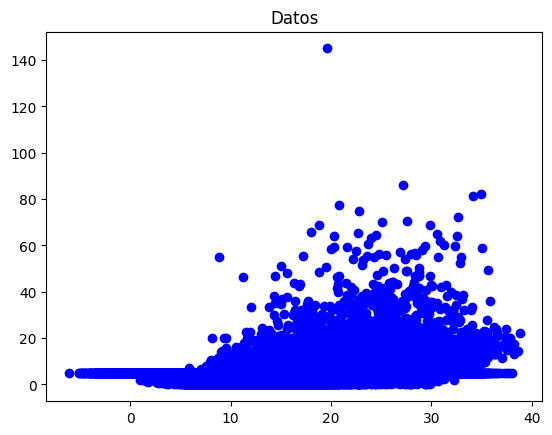

In [ ]:
#Almacenamos los datos de la variable independiente y dependiente

x = weather.PromMinMaxTemp.to_numpy()
y = weather.Evaporation
# Haremos un gráfico de los datos generados de la temperatura promedio y la evaporación
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos');

In [ ]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression

regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y)
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
# resultado: w = [0.09183522], b = 1.2858792525736682

w = [0.22437146], b = 1.1926141958218217


Ahora vamos a predecir la evaporación en mm^3 para una temperatura promedio de 5°C

In [ ]:
# vamos a predicir y = regresion_lineal(5°C)
nuevo_x = np.array([5])
prediccion = regresion_lineal.predict(nuevo_x.reshape(-1,1))
print(prediccion)
# resultado: [2.31447148]

[2.31447148]


**Observación:** Se predice que para una temperatura promedio de 5°C se predice una evaporación de 2,314 mm^3 de agua.

In [ ]:
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 8.172338628351113
Raíz del Error Cuadrático Medio (RMSE) = 2.858730247566411


In [ ]:
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(x.reshape(-1,1), y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.1957469046444562


# **Fase 4: Modelado**

Previo al modelamiento de datos, se definió la siguiente hipótesis a responder en los modelos.

## **Hipótesis: ¿Qué modelo puede predecir de mejor manera el comportamiento de la humedad en la capital de Australia?**

### **Mapa de Calor de Correlaciones**

Para la aplicación de los modelos, segmentaremos los datos exclusivamente a la ciudad de Canberra. Pero como primer paso, realizaremos un mapa de calor para visualizar y definir las variables a predecir. A continuación vamos a averiguar las correlaciones entre las variables, con el propósito de definifir preliminarmente cuáles son las variables que vamos a trabajar para el desarrollo de la hipótesis.

In [ ]:
#Matriz de correlación

corrmat = weather.corr()
corrmat

<ipython-input-337-6bb1a8fb4cf6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = weather.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,PromMinMaxTemp
MinTemp,1.000000,0.733836,0.103218,0.368186,0.098074,0.172059,0.175411,0.174239,-0.235188,0.005934,-0.421824,-0.434324,0.025353,-0.017400,0.897987,0.698952,0.123797,0.923253
MaxTemp,0.733836,1.000000,-0.073996,0.451435,0.334569,0.067543,0.015034,0.050993,-0.502380,-0.499663,-0.307182,-0.397655,-0.237165,-0.222641,0.880087,0.969124,-0.044160,0.938509
Rainfall,0.103218,-0.073996,1.000000,-0.042322,-0.158400,0.126497,0.085687,0.056401,0.221337,0.249310,-0.159616,-0.120349,0.159306,0.133865,0.011359,-0.077613,0.300762,0.010611
Evaporation,0.368186,0.451435,-0.042322,1.000000,0.276942,0.150533,0.149942,0.101659,-0.388832,-0.297877,-0.214049,-0.235072,-0.178925,-0.169657,0.429266,0.438180,-0.033283,0.442433
Sunshine,0.098074,0.334569,-0.158400,0.276942,1.000000,0.001568,0.048345,0.075763,-0.367987,-0.434788,0.018270,-0.025971,-0.560819,-0.580253,0.236063,0.355181,-0.205677,0.239059
WindGustSpeed,0.172059,0.067543,0.126497,0.150533,0.001568,1.000000,0.580393,0.659799,-0.210535,-0.028550,-0.425930,-0.385141,0.040270,0.064907,0.146483,0.033461,0.156004,0.125645
WindSpeed9am,0.175411,0.015034,0.085687,0.149942,0.048345,0.580393,1.000000,0.513796,-0.269299,-0.031213,-0.213005,-0.165347,-0.006483,0.013174,0.128754,0.005713,0.068593,0.097652
WindSpeed3pm,0.174239,0.050993,0.056401,0.101659,0.075763,0.659799,0.513796,1.000000,-0.146193,0.015699,-0.274536,-0.240284,0.021393,-0.000749,0.162136,0.028946,0.048248,0.117393
Humidity9am,-0.235188,-0.502380,0.221337,-0.388832,-0.367987,-0.210535,-0.269299,-0.146193,1.000000,0.660206,0.130611,0.176762,0.355697,0.281275,-0.471509,-0.494548,0.171134,-0.403651
Humidity3pm,0.005934,-0.499663,0.249310,-0.297877,-0.434788,-0.028550,-0.031213,0.015699,0.660206,1.000000,-0.026462,0.048601,0.392458,0.396422,-0.217521,-0.555752,0.306759,-0.279568


<Axes: >

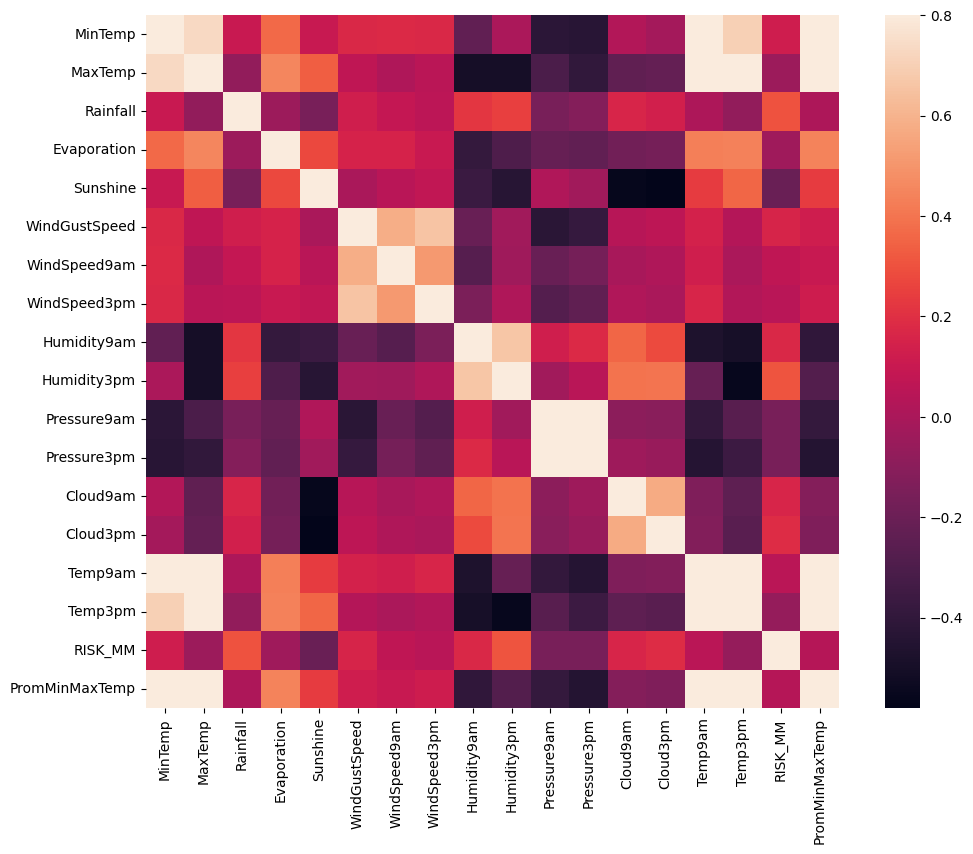

In [ ]:
#Heatmap (mapa de calor)

f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

De manera preliminar, vamos a trabajar con las siguientes variables que muestran una correlacción significativa con la humedad (Tanto de las 9AM como de las 3PM):
*   temp9am
*   temp3pm

Para este propósito crearemos 2 nuevas variables que serán utilizadas en los modelos:

*   **PromHumHour:** Promedio de la humedad de las 9AM y 3PM
*   **PromTempHour:** Promedio de la temperatura de las 9AM y 3PM



In [ ]:
#Se promedia la Humedad de las 9AM y las 3PM y se almacena en una nueva columna PromHumHour

weather['PromHumHour'] = weather[['Humidity9am', 'Humidity9am']].mean(axis=1)

In [ ]:
#Se promedia la temperatura de las 9AM y las 3PM y se almacena en una nueva columna PromTempHour

weather['PromTempHour'] = weather[['Temp9am', 'Temp3pm']].mean(axis=1)

Descripción de las variables creadas:

In [ ]:
weather.PromHumHour.describe()

count    142193.000000
mean         68.974028
std          18.967491
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: PromHumHour, dtype: float64

In [ ]:
weather.PromTempHour.describe()

count    142193.000000
mean         19.329813
std           6.410218
min          -6.300000
25%          14.600000
50%          18.950000
75%          23.850000
max          41.600000
Name: PromTempHour, dtype: float64

**Para ejecutar el mapa de calor incluyendo las nuevas variables, eliminaremos las columnas anteriores a la creación de variables.**

In [ ]:
weather.drop(columns = ["MinTemp"], inplace=True)
weather.drop(columns = ["MaxTemp"], inplace=True)
weather.drop(columns = ["Humidity9am"], inplace=True)
weather.drop(columns = ["Humidity3pm"], inplace=True)
weather.drop(columns = ["Temp9am"], inplace=True)
weather.drop(columns = ["Temp3pm"], inplace=True)

**Ejecutaremos nuevamente la matriz de correlación con las nuevas variables:**

In [ ]:
#Matriz de correlación
corrmat = weather.corr()
corrmat

<ipython-input-345-a8cc6a30f16a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = weather.corr()


,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RISK_MM,PromMinMaxTemp,PromHumHour,PromTempHour
Rainfall,1.000000,-0.042322,-0.158400,0.126497,0.085687,0.056401,-0.159616,-0.120349,0.159306,0.133865,0.300762,0.010611,0.221337,-0.035865
Evaporation,-0.042322,1.000000,0.276942,0.150533,0.149942,0.101659,-0.214049,-0.235072,-0.178925,-0.169657,-0.033283,0.442433,-0.388832,0.451565
Sunshine,-0.158400,0.276942,1.000000,0.001568,0.048345,0.075763,0.018270,-0.025971,-0.560819,-0.580253,-0.205677,0.239059,-0.367987,0.309544
WindGustSpeed,0.126497,0.150533,0.001568,1.000000,0.580393,0.659799,-0.425930,-0.385141,0.040270,0.064907,0.156004,0.125645,-0.210535,0.091884
WindSpeed9am,0.085687,0.149942,0.048345,0.580393,1.000000,0.513796,-0.213005,-0.165347,-0.006483,0.013174,0.068593,0.097652,-0.269299,0.068061
WindSpeed3pm,0.056401,0.101659,0.075763,0.659799,0.513796,1.000000,-0.274536,-0.240284,0.021393,-0.000749,0.048248,0.117393,-0.146193,0.097366
Pressure9am,-0.159616,-0.214049,0.018270,-0.425930,-0.213005,-0.274536,1.000000,0.959636,-0.090763,-0.101500,-0.156069,-0.388111,0.130611,-0.341303
Pressure3pm,-0.120349,-0.235072,-0.025971,-0.385141,-0.165347,-0.240284,0.959636,1.000000,-0.036674,-0.053232,-0.156617,-0.445631,0.176762,-0.416879
Cloud9am,0.159306,-0.178925,-0.560819,0.040270,-0.006483,0.021393,-0.090763,-0.036674,1.000000,0.572519,0.159300,-0.121243,0.355697,-0.197246
Cloud3pm,0.133865,-0.169657,-0.580253,0.064907,0.013174,-0.000749,-0.101500,-0.053232,0.572519,1.000000,0.186881,-0.134758,0.281275,-0.200130


<Axes: >

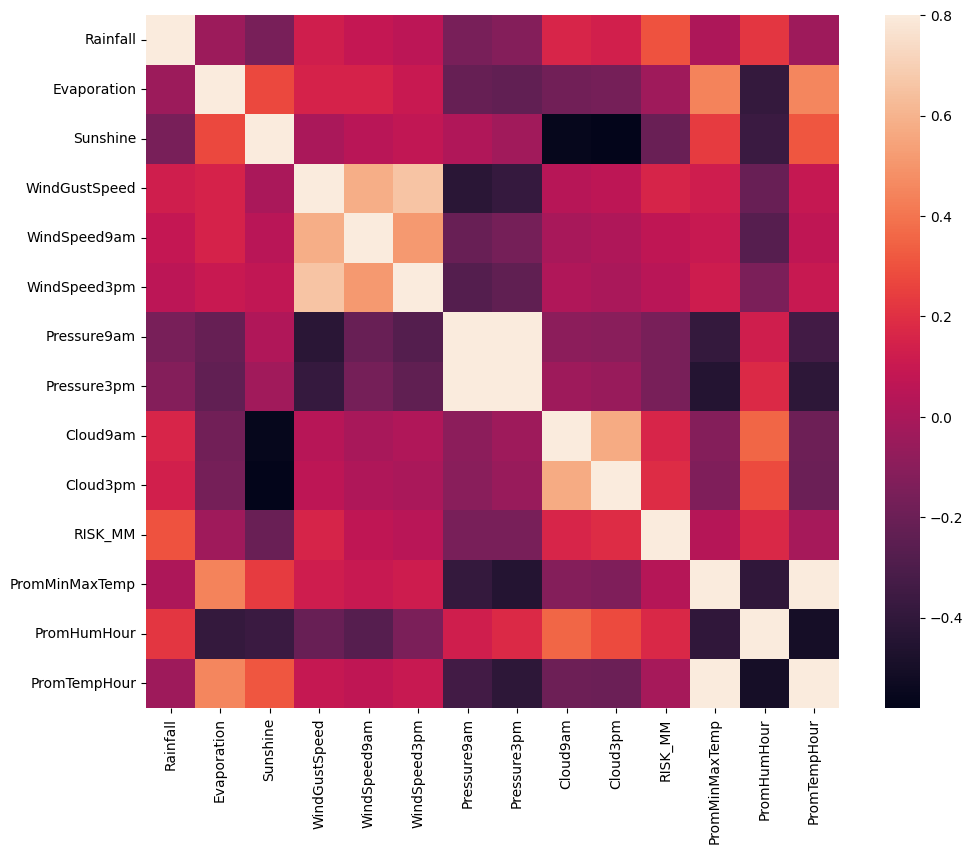

In [ ]:
#Heatmap (mapa de calor)

f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

Visualizando la matriz de correlación, podemos observar que las nuevas variables PromHumHour y PromTempHour tienen una correlación negativa de un -50%

## **Modelo de Regresión Lineal**

Revisaremos la correlación entre la variable independiente **temperatura** y la variable dependiente **humedad** mediante un modelo de regresión linea.

In [ ]:
#Agrupamos las variables para comprobar su correlación.
weatherTempHum = weather.groupby(['PromTempHour'])[['PromHumHour']].sum()
weatherTempHum

,PromHumHour
PromTempHour,
-6.30,97.0
-5.50,82.0
-5.25,97.0
-4.95,96.0
-4.75,98.0
...,...
40.90,11.0
41.10,10.0
41.10,20.0


En primer lugar visualizaremos las variables en un grafico de dispersión para ver su comportamiento.

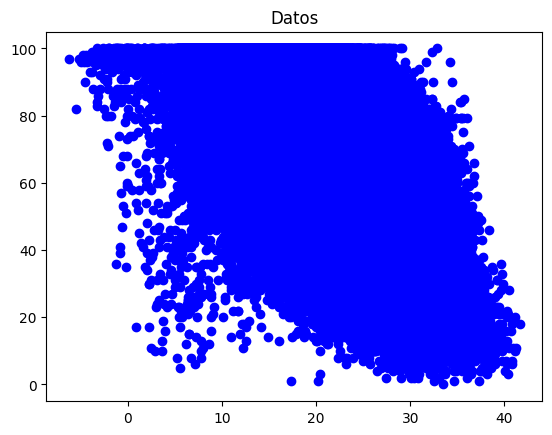

In [ ]:

x = weather.PromTempHour
y = weather.PromHumHour
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos');

Efectivamente, podemos concluir que existe una correlación negativa entre la temperatura y la humedad en Australia.

In [ ]:
from patsy import dmatrices
y, x = dmatrices('y ~ x', data = weather, return_type = 'dataframe')
y[:3]

,y
0,71.0
1,44.0
2,38.0


Datos estadísticos del gráfico de dispersión

In [ ]:
import statsmodels.api as sm

modelo = sm.OLS(y, x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                 4.819e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:06:34   Log-Likelihood:            -5.9945e+05
No. Observations:              142193   AIC:                         1.199e+06
Df Residuals:                  142191   BIC:                         1.199e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.7495      0.138    707.786      0.0

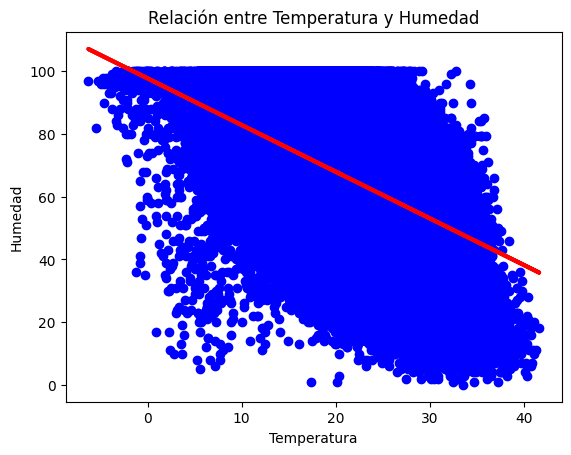

In [ ]:
x = weather.PromTempHour
y = weather.PromHumHour
plt.scatter(x,y,label='data', color='blue')
plt.plot(x, resultado.predict(), color="red", linewidth=3)
plt.title('Relación entre Temperatura y Humedad')
plt.xlabel('Temperatura')
plt.ylabel('Humedad')
plt.show()

**Ecuación de la recta:**

Humedad = -1.4887 * Temperatura + 97.7495

Con un Adj. R-squared de 0.253 nos damos cuenta que su capacidad predictiva es muy baja.

### **Ahora utilizaremos únicamente los datos de la capital australiana Canberra**

In [ ]:
pruebaTempCanberra = weather[weather['Location'] == 'Canberra']

Visualizaremos el gráfico de dispersión de Canberra

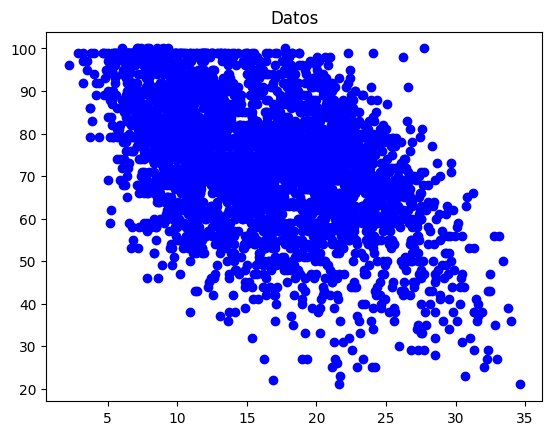

In [ ]:
Temperatura = pruebaTempCanberra.PromTempHour
Humedad = pruebaTempCanberra.PromHumHour
plt.scatter(Temperatura,Humedad,label='data', color='blue')
plt.title('Datos');

In [ ]:
from patsy import dmatrices
Humedad, Temperatura = dmatrices('Humedad ~ Temperatura', data = pruebaTempCanberra, return_type = 'dataframe')
Humedad[:3]

,Humedad
44351,68.0
44352,80.0
44353,82.0


In [ ]:
modelo = sm.OLS(Humedad, Temperatura)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Humedad   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     995.7
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          5.25e-192
Time:                        01:06:36   Log-Likelihood:                -13676.
No. Observations:                3418   AIC:                         2.736e+04
Df Residuals:                    3416   BIC:                         2.737e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      92.0306      0.635    145.035      

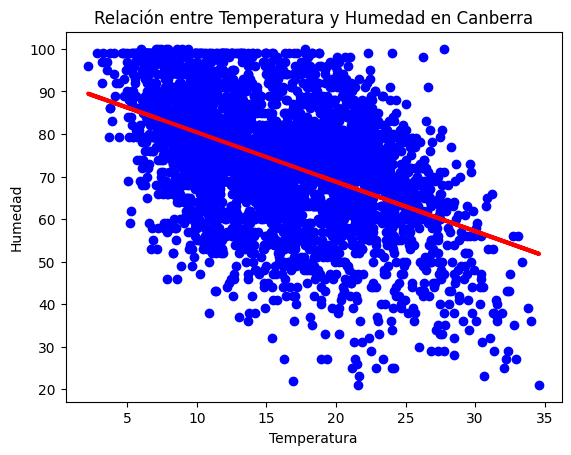

In [ ]:
Temperatura = pruebaTempCanberra.PromTempHour
Humedad = pruebaTempCanberra.PromHumHour
plt.scatter(Temperatura,Humedad,label='data', color='blue')
plt.plot(Temperatura, resultado.predict(), color="red", linewidth=3)
plt.title('Relación entre Temperatura y Humedad en Canberra')
plt.xlabel('Temperatura')
plt.ylabel('Humedad')
plt.show()

**Ecuación de la Recta:**

PromHumHour = -1.1625 * PromTempHour + 92.0306

*   Con un **coeficiente de determinación ajustado** (Adj. R-squared) de  0.225 nos damos cuenta que su capacidad predictiva es muy **baja**.

*   **El estadístico F** (F-statistic) de un 995.7 nos indica que una de la variable PromTempHour es altamente determinante.

*   **La máxima verosimilitud** (Log-Likelihood) de -13676 nos indica un ajuste muy deficiente del modelo a los datos.

*   **El Criterio de Información de Akaike** (AIC) de 2.736e+04 lo usaremos a posteriori para comparar diferentes modelos.

*   **El Criterio de Información Bayesiano** (BIC) de de 2.737e+04 lo usaremos a posteriori para comparar diferentes modelos.

## **Entrenamiento del Modelo de Regresión Lineal Simple**

El porcentaje de distribución del conjunto de entrenamiento y prueba es de un 80% y 20% respectivamente.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Obtener los datos del DataFrame
X = pruebaTempCanberra.PromTempHour.values.reshape(-1, 1)
y = pruebaTempCanberra.PromHumHour.values

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

#Creación de los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión lineal
lr = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
lr.fit(X_train, y_train)

#Creacion de prediccion con datos de test
y_pred = lr.predict(X_test)

Observamos en las métricas de desempeño del modelo durante el entrenamiento y la prueba son semejantes, además en las cifras no se observa ni overfitting ni underfitting, por lo tanto el entrenamiento del modelo de regresión lineal fué efectivo.

### **Gráfica de la Regresión Lineal**

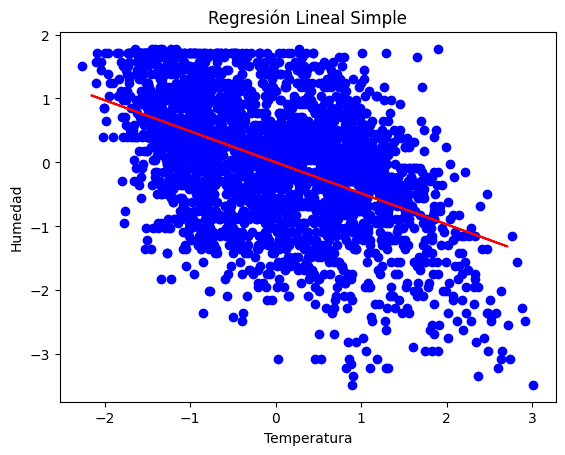

In [ ]:
# Graficando los datos de entrenamiento
plt.scatter(X_train, y_train, color='blue')

# Grafica de la regresión lineal con datos de la predicción
plt.plot(X_test, y_pred, color='red')
plt.title('Regresión Lineal Simple')
plt.xlabel('Temperatura')
plt.ylabel('Humedad')
plt.show()

### **Cálculo de Métricas de Desempeño**

**Métricas del modelo de Entrenamiento**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mse_train = mean_squared_error(y_train, lr.predict(X_train))
r2_train = r2_score(y_train, lr.predict(X_train))
mae_train = mean_absolute_error(y_train, lr.predict(X_train))
rmse_train = np.sqrt(mse_train)

print("Coeficiente de determinacion(R^2):", r2_train)
print("Error absoluto medio(MAE): ", mae_train)
print("Error cuadrático medio (MSE):", mse_train)
print("Error cuadrático medio(RMSE):", rmse_train)

Coeficiente de determinacion(R^2): 0.23229627161915267
Error absoluto medio(MAE):  0.7057724754056844
Error cuadrático medio (MSE): 0.7813054682295423
Error cuadrático medio(RMSE): 0.8839148534952573


**Métricas del modelo de Prueba**

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Coeficiente de determinación (R^2):", r2)
print("Error absoluto medio (MAE):", mae)
print("Error cuadrático medio (MSE):", mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)

Coeficiente de determinación (R^2): 0.19613363171535336
Error absoluto medio (MAE): 0.6864137761558127
Error cuadrático medio (MSE): 0.7468949156131313
Raíz del error cuadrático medio (RMSE): 0.8642308231098514


### **Datos de OLS (Método de Mínimos Cuadrados)**

In [ ]:
#Conversion a formato dataframe
y_test1 = pd.DataFrame(y_test)

In [ ]:
y_test1, X_test = dmatrices('y_test1 ~ X_test', return_type = 'dataframe')
y_test1[:3]

,y_test1
0,-0.088126
1,-2.748943
2,-0.287687


In [ ]:
modelo = sm.OLS(y_test1, X_test)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                y_test1   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     169.7
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           8.56e-35
Time:                        01:06:36   Log-Likelihood:                -869.44
No. Observations:                 684   AIC:                             1743.
Df Residuals:                     682   BIC:                             1752.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0041      0.033     -0.125      0.9

**Ecuación de Regresión lineal:**

PromHumHour = -1.1625 * PromTempHour + 92.0306

*   Con un **coeficiente de determinación ajustado** (Adj. R-squared) de 0.251, nos damos cuenta que, aunque haya mejorado su capacidad en comparación al modelo anterior, su capacidad predictiva es muy **baja**.

*   **El estadístico F** (F-statistic) de un 286.6 nos indica que una de la variable (PromTempHour) es altamente determinante.

*   **La máxima verosimilitud** (Log-Likelihood) de -3429.9 nos indica un ajuste muy deficiente del modelo a los datos.

*   **El Criterio de Información de Akaike** (AIC) de 6864 en comparación al primer modelo de 2.736e+04 y

*   **El Criterio de Información Bayesiano** (BIC) de 6873 en comparación al primer modelo de 2.737e+04 nos indica, en conclusión, que efectivamente, el nuevo modelo es de mejor calidad.



## **Modelo de Árbol de Regresión**

Al igual que con el modelo de Regresión Lineal Simple, los datos a analizar son exclusivos de la ciudad de Canberra.

In [ ]:
#Verificamos el dataframe a analizar
pruebaTempCanberra.head()

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow,PromMinMaxTemp,PromHumHour,PromTempHour
44351,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20.0,1019.7,1015.0,7.0,7.0,No,3.6,Yes,16.15,68.0,19.00
44352,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17.0,1012.4,1008.4,5.0,3.0,Yes,3.6,Yes,20.45,80.0,21.60
44353,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6.0,1009.5,1007.2,8.0,7.0,Yes,39.8,Yes,18.55,82.0,17.80
44354,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24.0,1005.5,1007.0,2.0,7.0,Yes,2.8,Yes,14.40,62.0,13.80
44355,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28.0,1018.3,1018.5,7.0,7.0,Yes,0.0,No,11.85,68.0,13.25


### **Entrenamiento y Prueba de Árbol de Decisión.**

El porcentaje de distribución del conjunto de entrenamiento y prueba es de un 80% y 20% respectivamente.

#### **Árbol sin podar**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#Variable Independiente y Dependiente
X = pruebaTempCanberra[['PromTempHour']].values.reshape(-1, 1)
y = pruebaTempCanberra.PromHumHour.values

#Escalamiento de Datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Separar los datos de "train" en entrenamiento y prueba para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2,random_state = 42)
dtr_model = DecisionTreeRegressor()

# Entrenamiento del modelo
dtr_model.fit(X_train, y_train)

# Validación del modelo
Y_pred = dtr_model.predict(X_test)

Profundidad del árbol: 20
Número de nodos terminales: 539


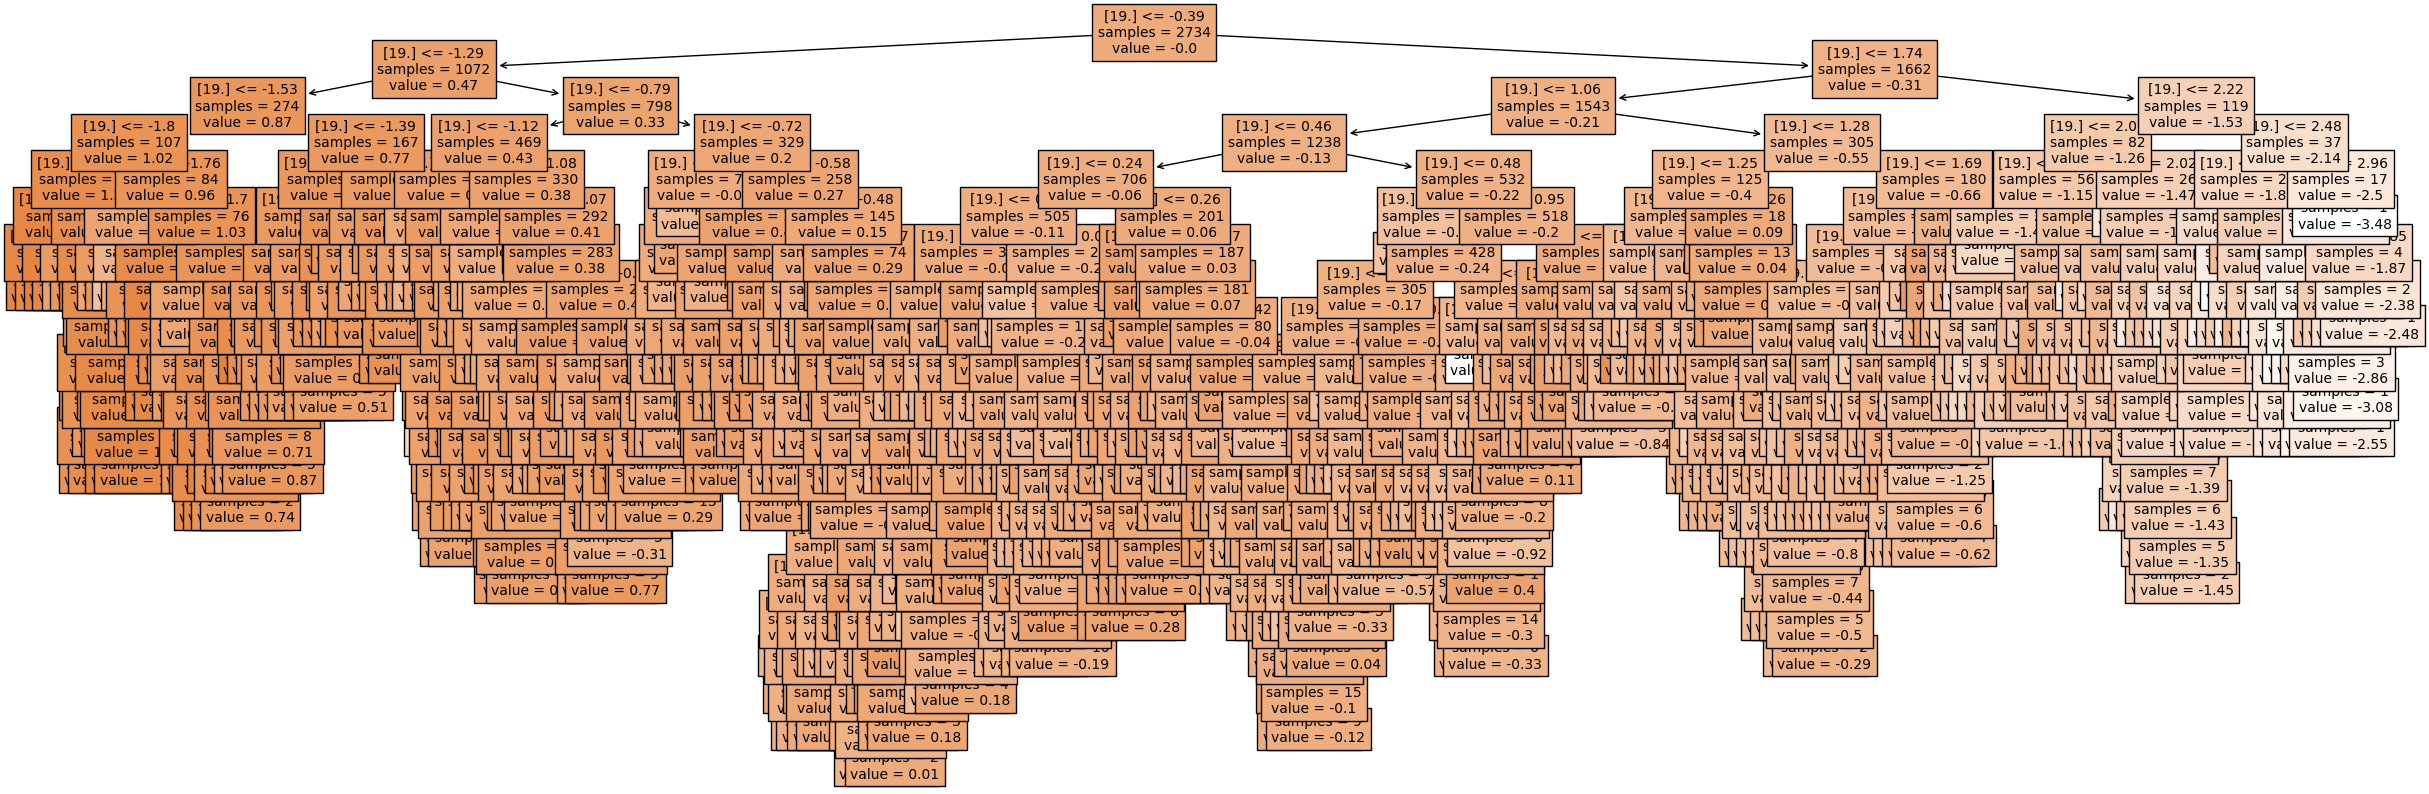

In [ ]:
from sklearn.tree import plot_tree

#Graficamos el Árbol de Decisión
fig, ax = plt.subplots(figsize=(30, 10))
print(f"Profundidad del árbol: {dtr_model.get_depth()}")
print(f"Número de nodos terminales: {dtr_model.get_n_leaves()}")
plot = plot_tree(

decision_tree = dtr_model,
feature_names = X,
class_names = 'PromHumHour',
filled = True,
impurity = False,
fontsize = 10,
precision = 2,
ax = ax
)

Cómo se puede observar, el resultado es desastroso, por lo tanto el podado definido será hasta el cuarto nivel.

#### **Árbol Podado**

Procedemos a podar el árbol a 4 niveles, con el propósito de obtener resultados más precisos.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#Variable Independiente y Dependiente
X = pruebaTempCanberra[['PromTempHour']].values.reshape(-1, 1)
y = pruebaTempCanberra.PromHumHour.values

#Escalamiento de Datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Separar los datos de "train" en entrenamiento y prueba para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2,random_state = 42)
dtr_model = DecisionTreeRegressor(max_depth = 4, random_state = 42)

# Entrenamiento del modelo
dtr_model.fit(X_train, y_train)

# Validación del modelo
Y_pred = dtr_model.predict(X_test)

Profundidad del árbol: 4
Número de nodos terminales: 16


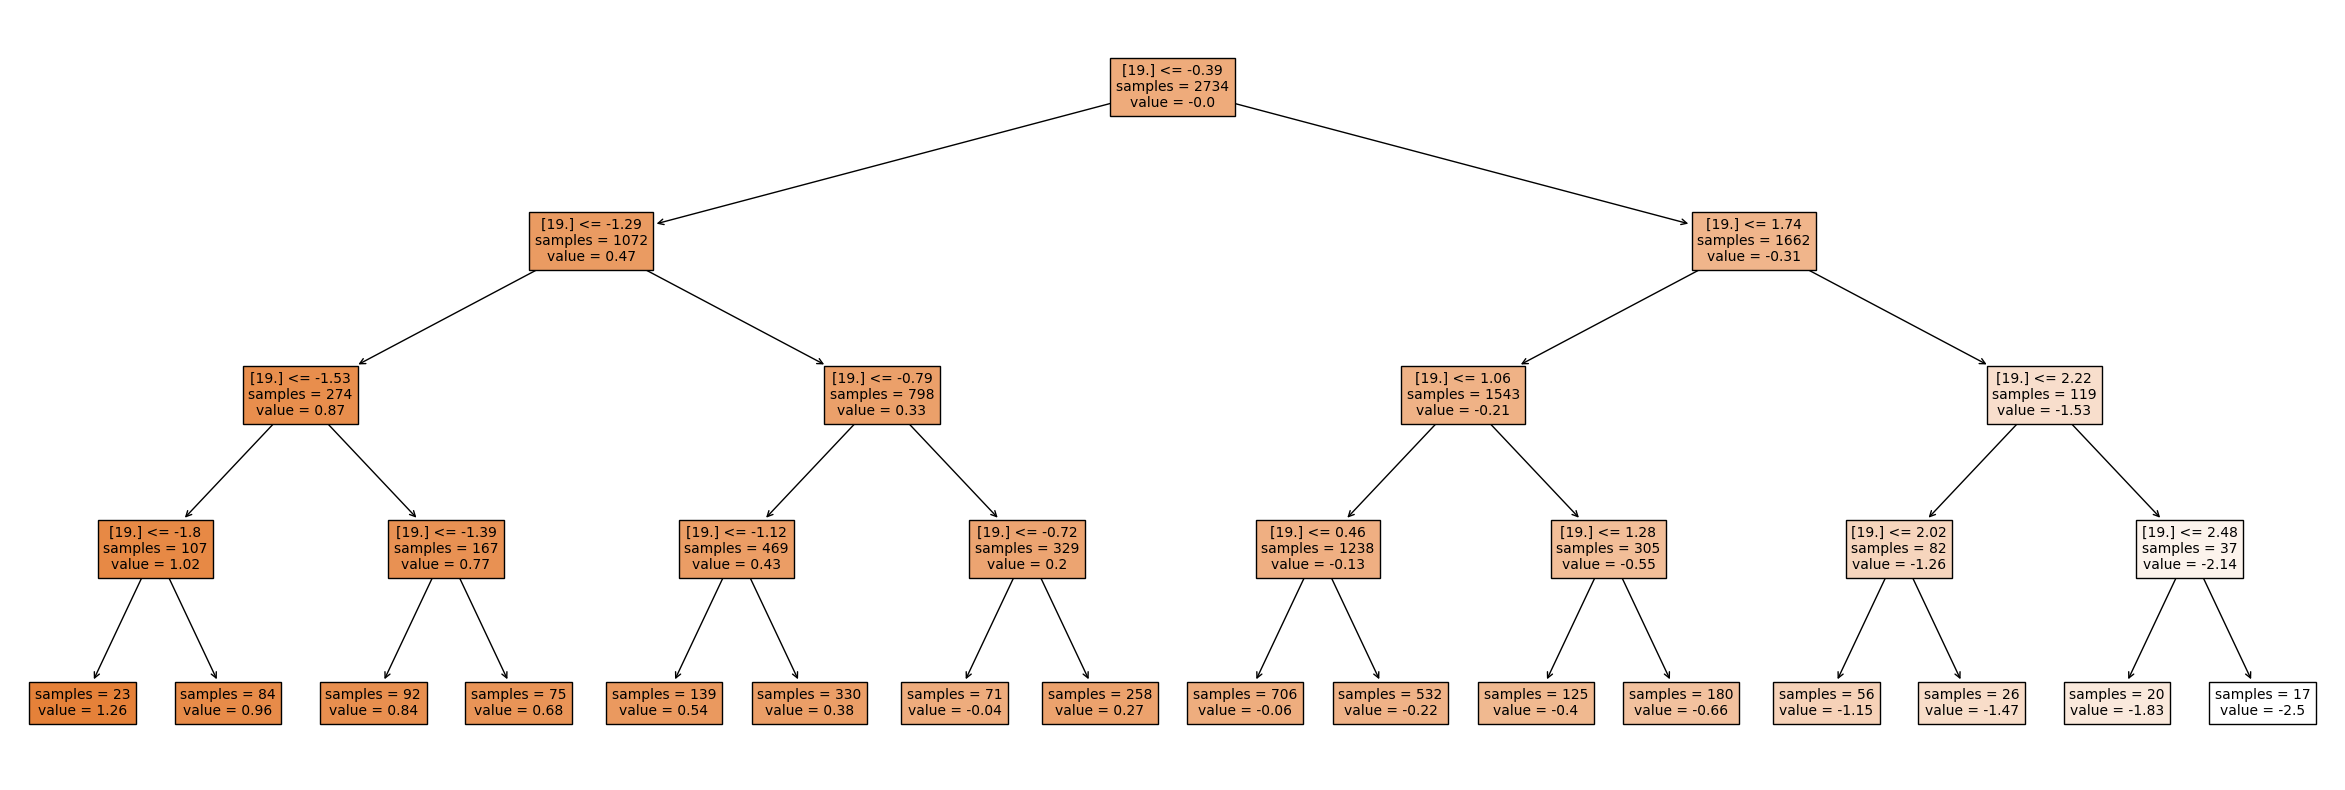

In [ ]:
from sklearn.tree import plot_tree

#Graficamos el Árbol de Decisión
fig, ax = plt.subplots(figsize=(30, 10))
print(f"Profundidad del árbol: {dtr_model.get_depth()}")
print(f"Número de nodos terminales: {dtr_model.get_n_leaves()}")
plot = plot_tree(

decision_tree = dtr_model,
feature_names = X,
class_names = 'PromHumHour',
filled = True,
impurity = False,
fontsize = 10,
precision = 2,
ax = ax
)

Podemos observar que la variable “Rainfall” tiene una cualidad determinante con respecto a la humedad, cuando la variable tiene un valor igual o menor a 3.62 milímetros, llega a unos porcentajes mayores al 90%.

### **Cálculo de Métricas de Desempeño**

**Métricas del modelo de Entrenamiento**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mse_train = mean_squared_error(y_train, dtr_model.predict(X_train))
r2_train = r2_score(y_train, dtr_model.predict(X_train))
mae_train = mean_absolute_error(y_train, dtr_model.predict(X_train))
rmse_train = np.sqrt(mse_train)

print("Coeficiente de determinacion(R^2):", r2_train)
print("Error absoluto medio(MAE): ", mae_train)
print("Error cuadrático medio (MSE):", mse_train)
print("Error cuadrático medio(RMSE):", rmse_train)

Coeficiente de determinacion(R^2): 0.2699745239768041
Error absoluto medio(MAE):  0.6806297462094628
Error cuadrático medio (MSE): 0.7429596539367637
Error cuadrático medio(RMSE): 0.8619510739808633


**Métricas del modelo de Prueba**

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Coeficiente de determinación (R^2):", r2)
print("Error absoluto medio (MAE):", mae)
print("Error cuadrático medio (MSE):", mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)

Coeficiente de determinación (R^2): 0.19613363171535336
Error absoluto medio (MAE): 0.6864137761558127
Error cuadrático medio (MSE): 0.7468949156131313
Raíz del error cuadrático medio (RMSE): 0.8642308231098514


# **Fase 5 - Evaluación**

En esta fase se describe la interpretación de las métricas de desempeño de los 2 modelos de regresión creados en este informe.

### **Interpretación de Métricas de Regresión Lineal**

*   **Coeficiente de Determinación (R2):** Tanto durante el entrenamiento como en la prueba del modelo, el puntaje de precisión predictivo es bastante bajo, demostrando una mala calidad predictiva.
*   **Error Absoluto Medio (MAE):** Tanto durante el entrenamiento como en la prueba, las predicciones del modelo difieren de los valores reales en aproximadamente 0.68 unidades. Su valor no está cerca de 0, por lo tanto la precisión de las predicciones es deficiente.
*   **Error cuadrático medio (MSE):** Tanto durante el entrenamiento como en la prueba, su valor es de 0.74, demostrando una alta cantidad de errores al momento de predecir, porque su valor está más cerca de 1.
*   **Raíz del error cuadrático medio (RMSE):** Al igual que sucede con el error cuadrático medio, su valor tanto durante el entrenamiento como durante la prueba es de 0.86, demostrando una mala precisión en las predicciones.





### **Interpretación de Métricas de Árbol de Regresión**

*   **Coeficiente de Determinación (R2):** Tanto durante el entrenamiento como en la prueba del modelo, el puntaje de precisión predictivo es bastante bajo, 0.23 y 0.19 respectivamente, demostrando una mala calidad predictiva.
*   **Error Absoluto Medio (MAE):** Tanto durante el entrenamiento como en la prueba, las predicciones del modelo difieren de los valores reales en 0.68 unidades. Su valor no está cerca de 0, por lo tanto la precisión de las predicciones es deficiente.
*   **Error cuadrático medio (MSE):** Tanto durante el entrenamiento como en la prueba, su valor oscila entre 0.78 y 0.74, demostrando una alta cantidad de errores al momento de predecir, porque su valor está más cerca de 1.
*   **Raíz del error cuadrático medio (RMSE):** Al igual que sucede con el error cuadrático medio, su valor tanto durante el entrenamiento como durante la prueba es de 0.8, demostrando una mala precisión en las predicciones.

# **Fase 6 - Deployment**

Para presentar visualizaciones correspondientes a los datos del clima Australiano, se procede a exportar el Dataframe limpio tanto en formato Excel como CSV.

### Conversión a Excel

In [ ]:
# Exportar a Excel
weather.to_excel('weather_et.xlsx')

### Conversión a CSV

In [ ]:
# Exportar el dataframe a un archivo CSV.
weather.to_csv('weather_et.csv', index=False)

# Descargar el archivo CSV a tu computadora local.
from google.colab import files
files.download('weather_et.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>